# **COMPREHENSIVE VISUALIZATION ANALYSIS FOR EDA**
# **Mathematical Foundations & Practical Applications**

## **Navigation & Overview**

### **📊 Visualization Categories Covered:**

**BASIC VISUALIZATIONS:**
- **Bar Charts** - Frequency & proportion analysis with Chi-square foundations
- **Pie Charts** - Proportional representation with entropy theory
- **Donut Charts** - Enhanced pie charts with information density optimization

**ADVANCED VISUALIZATIONS:**  
- **Stacked Bar Charts** - Multi-dimensional categorical relationships
- **Grouped Bar Charts** - Comparative categorical analysis
- **Heatmaps** - Correlation matrices and contingency table analysis
- **Waffle Charts** - Grid-based proportional representation
- **Treemaps** - Hierarchical data visualization with area encoding

**DISTRIBUTION VISUALIZATIONS:**
- **Histograms** - Probability density estimation and normality assessment
- **Kernel Density Estimation (KDE)** - Continuous probability distributions
- **Box Plots** - Quartile analysis and outlier detection
- **Violin Plots** - Distribution shape analysis combining box plots and KDE
- **Q-Q Plots** - Distributional comparison and normality testing

**RELATIONSHIP VISUALIZATIONS:**
- **Scatter Plots** - Bivariate correlation and pattern detection
- **Correlation Matrices** - Linear relationship quantification
- **Pair Plots** - Multivariate relationship exploration
- **Joint Plots** - Combined marginal and joint distributions

### **🔬 Mathematical Framework:**

Each visualization is analyzed through:
1. **Mathematical Foundation** - Statistical principles and formulas
2. **Information Theory** - Entropy, mutual information, and data compression
3. **Visual Perception** - How human perception interprets visual encodings
4. **Statistical Inference** - What conclusions can be drawn from each visualization
5. **Interpretation Guidelines** - How to read and analyze each chart type

### **🎯 Learning Objectives:**

- Understand the mathematical principles underlying each visualization
- Learn when to use each visualization type for maximum insight
- Master interpretation techniques for general EDA applications
- Apply comprehensive visualization analysis to real-world datasets


In [2]:
# Setup and Configuration
%store -r

print("Project configuration:")
print(f"SLUG = {SLUG}")
print(f"DATA_DIR = {DATA_DIR}")
print(f"DATASET_KEY = {DATASET_KEY}")
print(f"FIG_DIR = {FIG_DIR}")
print(f"REP_DIR = {REP_DIR}")
print(f"NOTEBOOK_DIR = {NOTEBOOK_DIR}")

missing_vars = [var for var in ['SLUG', 'DATA_DIR', 'FIG_DIR', 'REP_DIR', 'NOTEBOOK_DIR', 'DATASET_KEY'] if var not in globals()]
print(f"Vars not found in globals: {missing_vars}")

# Set default values if variables are not found in store or are empty
if not SLUG:  # Check if empty string
    print(f"{SLUG=} is empty, initializing everything explicitly")
    SLUG = 'customer-segmentation'
    DATASET_KEY = 'vjchoudhary7/customer-segmentation-tutorial-in-python'
    GIT_ROOT = Path.cwd().parent.parent.parent
    DATA_DIR = GIT_ROOT / 'data' / SLUG
    FIG_DIR = GIT_ROOT / 'figures' / SLUG
    REP_DIR = GIT_ROOT / 'reports' / SLUG
    NOTEBOOK_DIR = GIT_ROOT / 'notebooks' / SLUG


Project configuration:
SLUG = customer-segmentation
DATA_DIR = /Users/ravisharma/workdir/eda_practice/data/customer-segmentation
DATASET_KEY = vjchoudhary7/customer-segmentation-tutorial-in-python
FIG_DIR = /Users/ravisharma/workdir/eda_practice/figures/customer-segmentation
REP_DIR = /Users/ravisharma/workdir/eda_practice/reports/customer-segmentation
NOTEBOOK_DIR = /Users/ravisharma/workdir/eda_practice/notebooks/customer-segmentation
Vars not found in globals: []


In [4]:
# Import Libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import entropy, chi2_contingency, normaltest, shapiro
import warnings
import itertools
from matplotlib.patches import Rectangle
import squarify  # For treemaps
from pywaffle import Waffle  # For waffle charts
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

warnings.filterwarnings('ignore')

# Set style and configuration
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load dataset
df = pd.read_csv(DATA_DIR / 'Mall_Customers.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


Dataset shape: (200, 5)
Columns: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

First few rows:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **SECTION 1: BASIC VISUALIZATIONS**

## **1.1 Bar Charts - Frequency & Proportion Analysis**

### **📊 Mathematical Foundation:**

Bar charts visualize categorical data through the fundamental counting principle:
- **Frequency**: \( f_i = \sum_{j=1}^{n} \mathbf{1}_{x_j = c_i} \)
- **Relative Frequency**: \( p_i = \frac{f_i}{n} \) where \( \sum_{i=1}^{k} p_i = 1 \)
- **Chi-square Test**: \( \chi^2 = \sum_{i=1}^{k} \frac{(O_i - E_i)^2}{E_i} \)

### **🔍 What Bar Charts Uniquely Detect:**

1. **Categorical Distribution Shape** - Uniform vs. skewed distributions
2. **Mode Identification** - Most frequent category visually apparent
3. **Frequency Comparison** - Direct visual comparison between categories
4. **Statistical Significance** - Visual assessment of deviations from expected frequencies

### **📈 Interpretation Guidelines:**

- **Height ∝ Frequency**: Taller bars indicate higher frequency
- **Spacing**: Gaps between bars emphasize categorical nature (vs. continuous)
- **Order**: Categories can be ordered by frequency for insight clarity
- **Color**: Can encode additional dimensions or highlight specific categories


=== BAR CHART ANALYSIS: GENDER DISTRIBUTION ===


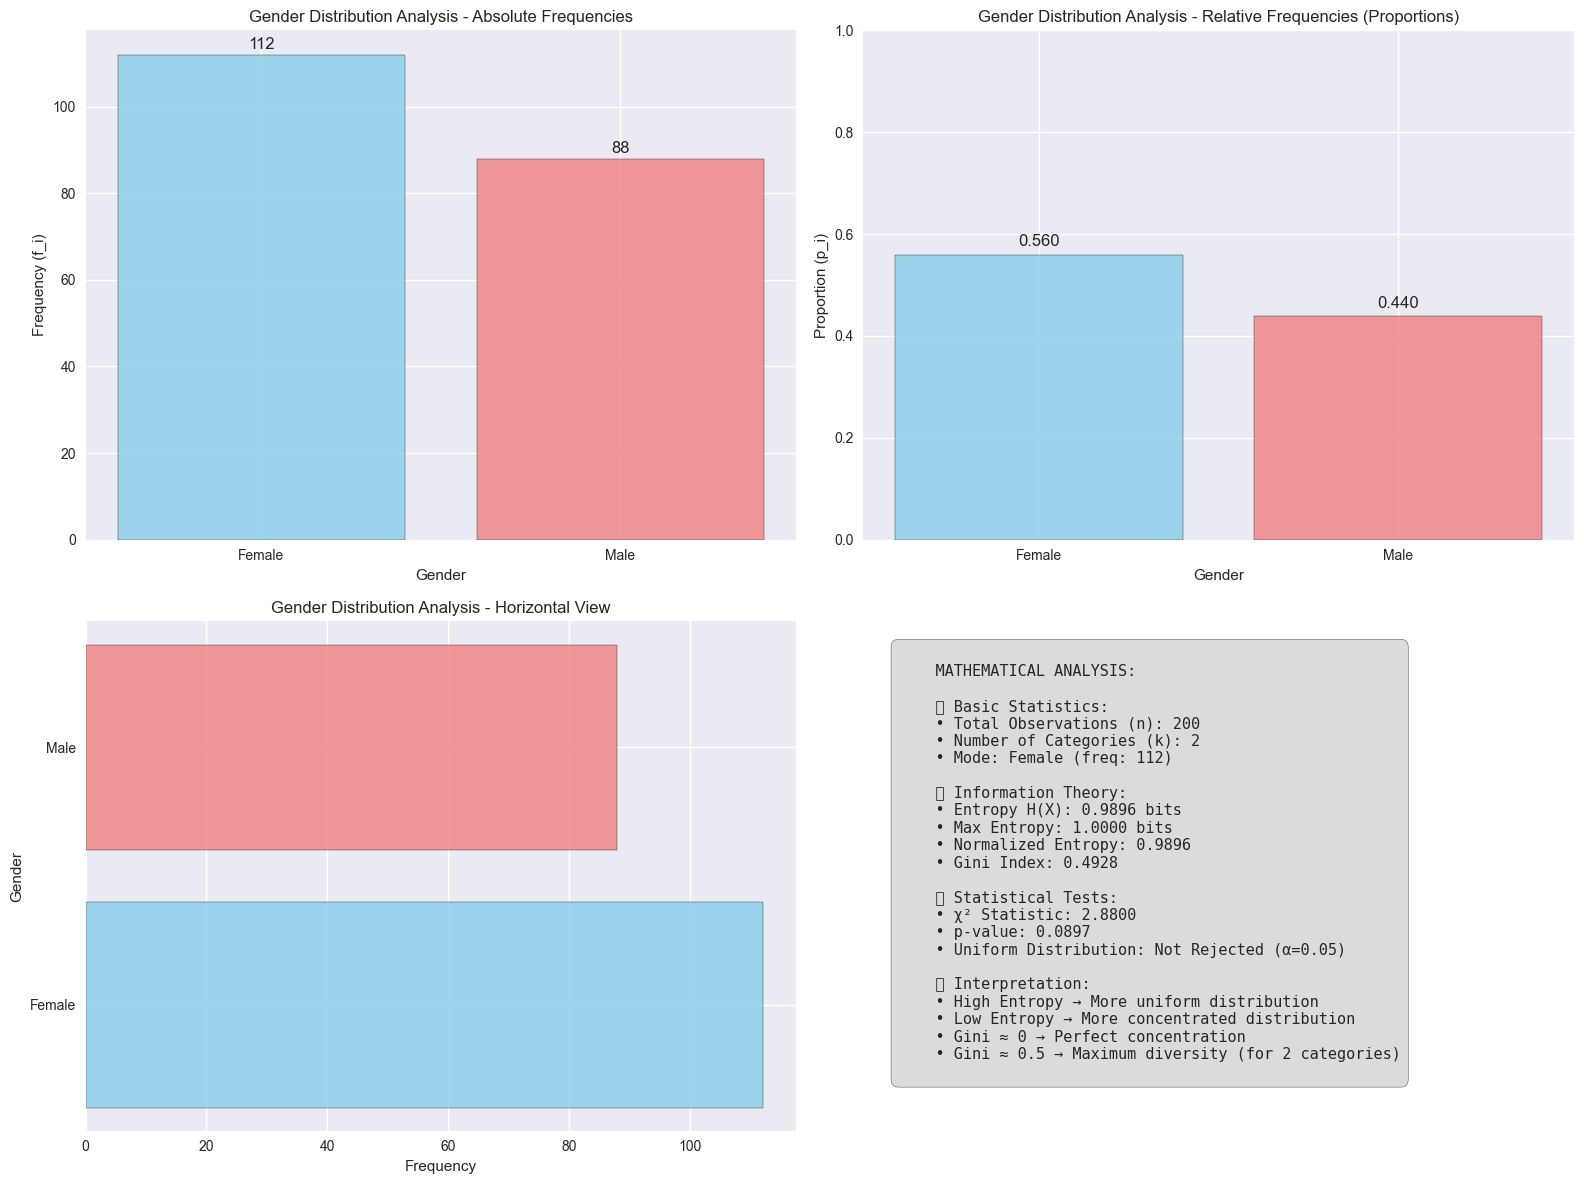

In [5]:
# Bar Chart Implementation with Mathematical Analysis

def analyze_bar_chart(data, column, title="Bar Chart Analysis"):
    """
    Comprehensive bar chart analysis with mathematical foundations
    """
    # Calculate frequencies and proportions
    value_counts = data[column].value_counts()
    proportions = data[column].value_counts(normalize=True)
    n_categories = len(value_counts)
    total_observations = len(data)
    
    # Mathematical measures
    # Entropy: H(X) = -Σ p_i * log2(p_i)
    entropy_value = entropy(proportions, base=2)
    max_entropy = np.log2(n_categories)  # Maximum possible entropy
    normalized_entropy = entropy_value / max_entropy if max_entropy > 0 else 0
    
    # Chi-square goodness of fit test (uniform distribution)
    expected_freq = total_observations / n_categories
    chi2_stat, p_value = stats.chisquare(value_counts)
    
    # Gini index: 1 - Σ p_i^2 (measure of impurity)
    gini_index = 1 - np.sum(proportions ** 2)
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Frequency Bar Chart
    bars1 = ax1.bar(value_counts.index, value_counts.values, 
                    color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
    ax1.set_title(f'{title} - Absolute Frequencies')
    ax1.set_ylabel('Frequency (f_i)')
    ax1.set_xlabel(column)
    
    # Add frequency labels on bars
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom')
    
    # 2. Proportion Bar Chart
    bars2 = ax2.bar(proportions.index, proportions.values,
                    color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
    ax2.set_title(f'{title} - Relative Frequencies (Proportions)')
    ax2.set_ylabel('Proportion (p_i)')
    ax2.set_xlabel(column)
    ax2.set_ylim(0, 1)
    
    # Add proportion labels on bars
    for i, bar in enumerate(bars2):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom')
    
    # 3. Horizontal Bar Chart (alternative view)
    bars3 = ax3.barh(value_counts.index, value_counts.values,
                     color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
    ax3.set_title(f'{title} - Horizontal View')
    ax3.set_xlabel('Frequency')
    ax3.set_ylabel(column)
    
    # 4. Mathematical Analysis Display
    ax4.axis('off')
    analysis_text = f"""
    MATHEMATICAL ANALYSIS:
    
    📊 Basic Statistics:
    • Total Observations (n): {total_observations}
    • Number of Categories (k): {n_categories}
    • Mode: {value_counts.index[0]} (freq: {value_counts.iloc[0]})
    
    📈 Information Theory:
    • Entropy H(X): {entropy_value:.4f} bits
    • Max Entropy: {max_entropy:.4f} bits  
    • Normalized Entropy: {normalized_entropy:.4f}
    • Gini Index: {gini_index:.4f}
    
    🔬 Statistical Tests:
    • χ² Statistic: {chi2_stat:.4f}
    • p-value: {p_value:.4f}
    • Uniform Distribution: {'Rejected' if p_value < 0.05 else 'Not Rejected'} (α=0.05)
    
    🎯 Interpretation:
    • High Entropy → More uniform distribution
    • Low Entropy → More concentrated distribution
    • Gini ≈ 0 → Perfect concentration
    • Gini ≈ 0.5 → Maximum diversity (for 2 categories)
    """
    
    ax4.text(0.05, 0.95, analysis_text, transform=ax4.transAxes, 
            fontsize=11, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'entropy': entropy_value,
        'normalized_entropy': normalized_entropy,
        'gini_index': gini_index,
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'value_counts': value_counts,
        'proportions': proportions
    }

# Apply to Gender column
print("=== BAR CHART ANALYSIS: GENDER DISTRIBUTION ===")
gender_analysis = analyze_bar_chart(df, 'Gender', 'Gender Distribution Analysis')


## **1.2 Pie Charts - Proportional Representation & Entropy Theory**

### **📊 Mathematical Foundation:**

Pie charts represent proportional data through angular encoding:
- **Angular Encoding**: \( \theta_i = 2\pi \cdot p_i \) where \( p_i = \frac{f_i}{n} \)
- **Area Encoding**: \( A_i = \pi r^2 \cdot p_i \) (for pie sector area)
- **Entropy Maximization**: Uniform distribution maximizes \( H(X) = -\sum_{i=1}^{k} p_i \log_2(p_i) \)

### **🔍 What Pie Charts Uniquely Detect:**

1. **Part-to-Whole Relationships** - Visual proportion comprehension
2. **Dominant Categories** - Largest slices immediately apparent
3. **Balance Assessment** - Visual equilibrium vs. imbalance
4. **Information Density** - Entropy visualization through slice uniformity

### **📈 Interpretation Guidelines:**

- **Angle ∝ Proportion**: Larger angles indicate higher proportions
- **Color Contrast**: Enhances category distinction and pattern recognition
- **Slice Ordering**: Typically largest to smallest for clarity
- **3D Effects**: Avoid as they distort angle perception


=== PIE CHART ANALYSIS: GENDER DISTRIBUTION ===


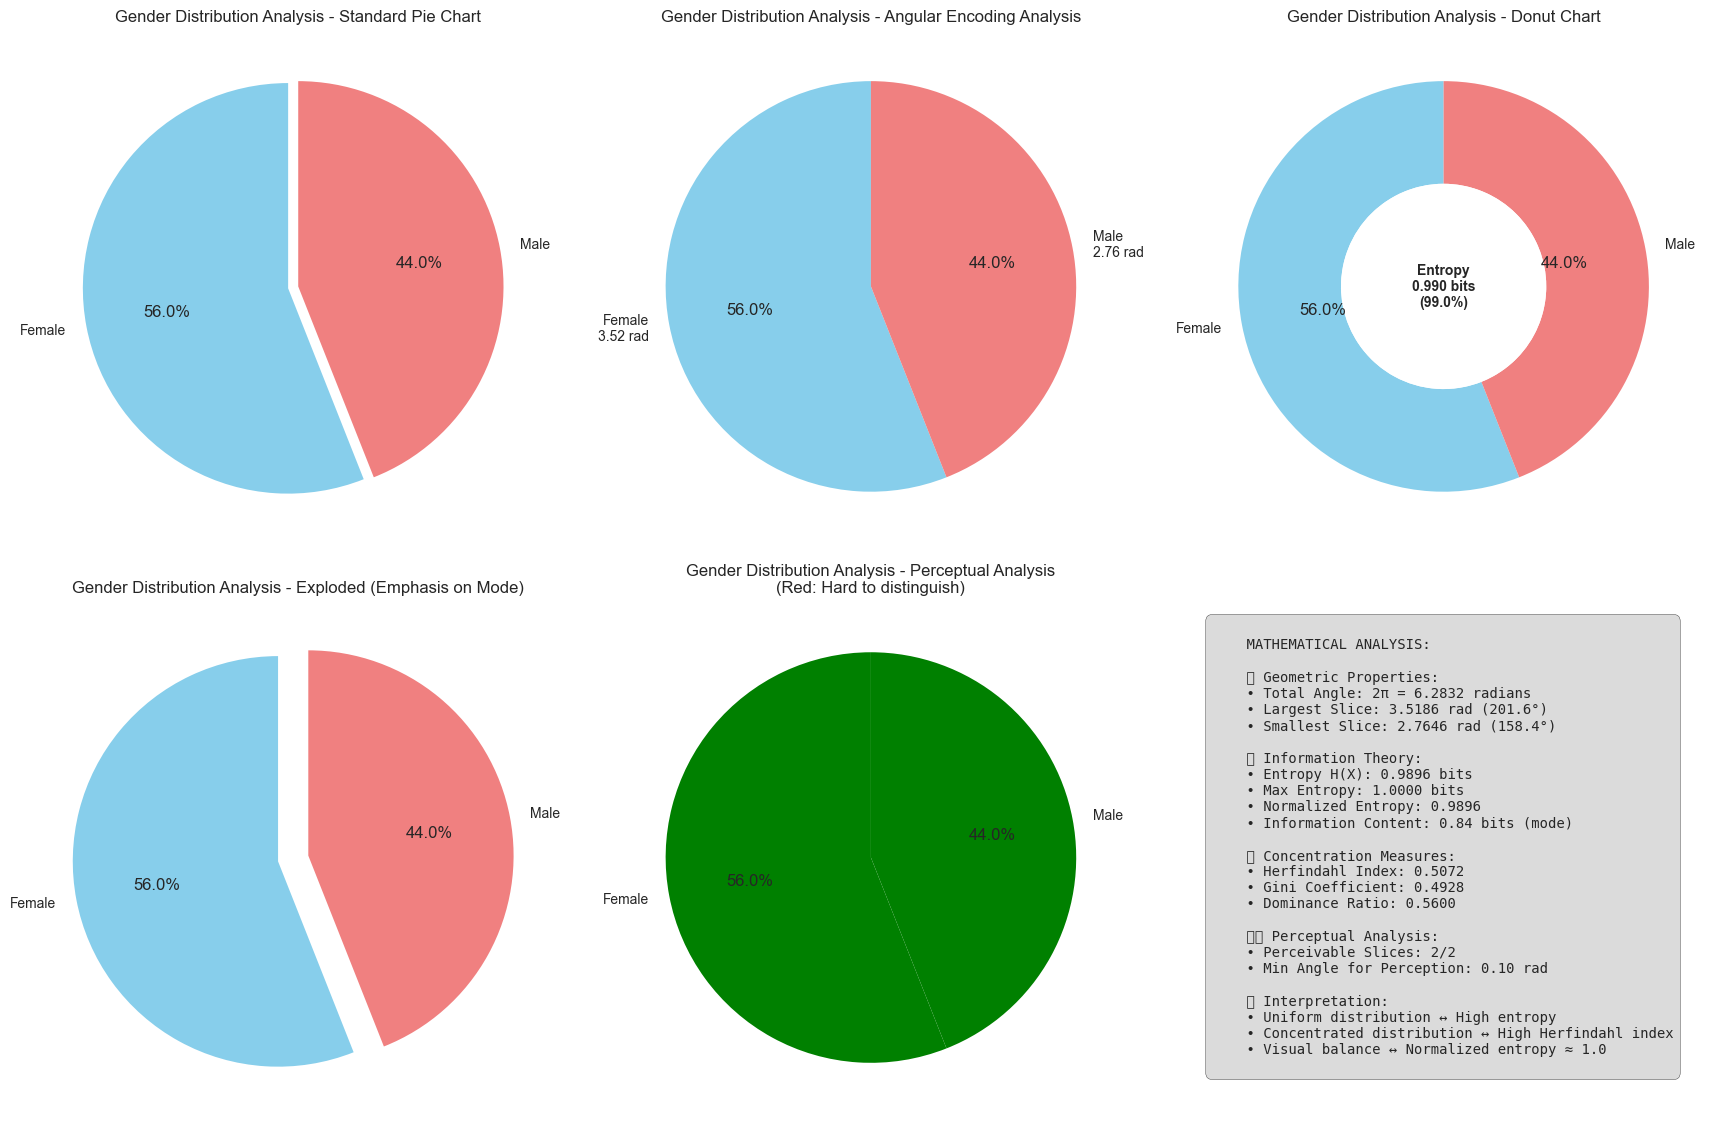

In [6]:
# Pie Chart Implementation with Mathematical Analysis

def analyze_pie_chart(data, column, title="Pie Chart Analysis"):
    """
    Comprehensive pie chart analysis with mathematical foundations
    """
    # Calculate frequencies and proportions
    value_counts = data[column].value_counts()
    proportions = data[column].value_counts(normalize=True)
    n_categories = len(value_counts)
    total_observations = len(data)
    
    # Mathematical measures
    # Angular encoding: θ_i = 2π * p_i
    angles = 2 * np.pi * proportions
    
    # Entropy and information measures
    entropy_value = entropy(proportions, base=2)
    max_entropy = np.log2(n_categories)
    normalized_entropy = entropy_value / max_entropy if max_entropy > 0 else 0
    
    # Concentration measures
    herfindahl_index = np.sum(proportions ** 2)  # Market concentration index
    gini_coefficient = 1 - herfindahl_index
    
    # Visual perception measures
    # Smallest distinguishable angle (just noticeable difference ~0.1 radians)
    min_perceivable_angle = 0.1
    perceivable_slices = angles >= min_perceivable_angle
    
    # Create visualization
    fig = plt.figure(figsize=(18, 12))
    
    # 1. Standard Pie Chart
    ax1 = plt.subplot(2, 3, 1)
    colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink']
    wedges, texts, autotexts = ax1.pie(value_counts.values, 
                                      labels=value_counts.index,
                                      autopct='%1.1f%%',
                                      startangle=90,
                                      colors=colors[:len(value_counts)],
                                      explode=[0.05 if i == 0 else 0 for i in range(len(value_counts))])
    ax1.set_title(f'{title} - Standard Pie Chart')
    
    # 2. Pie Chart with Angular Analysis
    ax2 = plt.subplot(2, 3, 2)
    wedges2, texts2, autotexts2 = ax2.pie(value_counts.values,
                                         labels=[f"{idx}\n{angles[idx]:.2f} rad" 
                                               for idx in value_counts.index],
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=colors[:len(value_counts)])
    ax2.set_title(f'{title} - Angular Encoding Analysis')
    
    # 3. Donut Chart (Enhanced Pie Chart)
    ax3 = plt.subplot(2, 3, 3)
    wedges3, texts3, autotexts3 = ax3.pie(value_counts.values,
                                         labels=value_counts.index,
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=colors[:len(value_counts)],
                                         wedgeprops=dict(width=0.5))
    ax3.set_title(f'{title} - Donut Chart')
    
    # Add center text with entropy information
    centre_circle = plt.Circle((0,0), 0.50, fc='white')
    ax3.add_artist(centre_circle)
    ax3.text(0, 0, f'Entropy\n{entropy_value:.3f} bits\n({normalized_entropy:.1%})', 
            ha='center', va='center', fontsize=10, fontweight='bold')
    
    # 4. Exploded Pie Chart for Category Emphasis
    ax4 = plt.subplot(2, 3, 4)
    explode = tuple(0.1 if prop == proportions.max() else 0.05 for prop in proportions)
    wedges4, texts4, autotexts4 = ax4.pie(value_counts.values,
                                         labels=value_counts.index,
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=colors[:len(value_counts)],
                                         explode=explode)
    ax4.set_title(f'{title} - Exploded (Emphasis on Mode)')
    
    # 5. Perception Analysis
    ax5 = plt.subplot(2, 3, 5)
    perception_colors = ['red' if not perceivable else 'green' for perceivable in perceivable_slices]
    wedges5, texts5, autotexts5 = ax5.pie(value_counts.values,
                                         labels=value_counts.index,
                                         autopct='%1.1f%%',
                                         startangle=90,
                                         colors=perception_colors)
    ax5.set_title(f'{title} - Perceptual Analysis\n(Red: Hard to distinguish)')
    
    # 6. Mathematical Analysis Display
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')
    
    analysis_text = f"""
    MATHEMATICAL ANALYSIS:
    
    📊 Geometric Properties:
    • Total Angle: 2π = {2*np.pi:.4f} radians
    • Largest Slice: {angles.max():.4f} rad ({np.degrees(angles.max()):.1f}°)
    • Smallest Slice: {angles.min():.4f} rad ({np.degrees(angles.min()):.1f}°)
    
    📈 Information Theory:
    • Entropy H(X): {entropy_value:.4f} bits
    • Max Entropy: {max_entropy:.4f} bits
    • Normalized Entropy: {normalized_entropy:.4f}
    • Information Content: {-np.log2(proportions.max()):.2f} bits (mode)
    
    🔬 Concentration Measures:
    • Herfindahl Index: {herfindahl_index:.4f}
    • Gini Coefficient: {gini_coefficient:.4f}
    • Dominance Ratio: {proportions.max():.4f}
    
    👁️ Perceptual Analysis:
    • Perceivable Slices: {perceivable_slices.sum()}/{len(perceivable_slices)}
    • Min Angle for Perception: {min_perceivable_angle:.2f} rad
    
    🎯 Interpretation:
    • Uniform distribution ↔ High entropy
    • Concentrated distribution ↔ High Herfindahl index
    • Visual balance ↔ Normalized entropy ≈ 1.0
    """
    
    ax6.text(0.05, 0.95, analysis_text, transform=ax6.transAxes,
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'entropy': entropy_value,
        'normalized_entropy': normalized_entropy,
        'angles': angles,
        'herfindahl_index': herfindahl_index,
        'gini_coefficient': gini_coefficient,
        'perceivable_slices': perceivable_slices,
        'value_counts': value_counts,
        'proportions': proportions
    }

# Apply to Gender column
print("=== PIE CHART ANALYSIS: GENDER DISTRIBUTION ===")
pie_analysis = analyze_pie_chart(df, 'Gender', 'Gender Distribution Analysis')


# **SECTION 2: DISTRIBUTION VISUALIZATIONS**

## **2.1 Histograms - Probability Density Estimation**

### **📊 Mathematical Foundation:**

Histograms estimate probability density functions through binning:
- **Bin Width**: \( h = \frac{x_{max} - x_{min}}{k} \) where \( k \) is number of bins
- **Density Estimation**: \( \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} \mathbf{1}_{x_i \in \text{bin}} \)
- **Sturges' Rule**: \( k = \lceil \log_2(n) \rceil + 1 \)
- **Scott's Rule**: \( h = 3.49\hat{\sigma}n^{-1/3} \)

### **🔍 What Histograms Uniquely Detect:**

1. **Distribution Shape** - Symmetry, skewness, modality
2. **Central Tendency** - Location of peaks and modes
3. **Variability** - Spread and dispersion patterns
4. **Outliers** - Extreme values in tail regions
5. **Normality Assessment** - Bell curve approximation

### **📈 Interpretation Guidelines:**

- **Bin Height ∝ Frequency**: Taller bins indicate higher density
- **Shape Analysis**: Normal, uniform, skewed, bimodal distributions
- **Tail Behavior**: Heavy vs. light tails, outlier presence
- **Central Limit Theorem**: Large samples approach normality


=== HISTOGRAM ANALYSIS: AGE ===


AttributeError: module 'scipy.stats' has no attribute 'find_peaks'

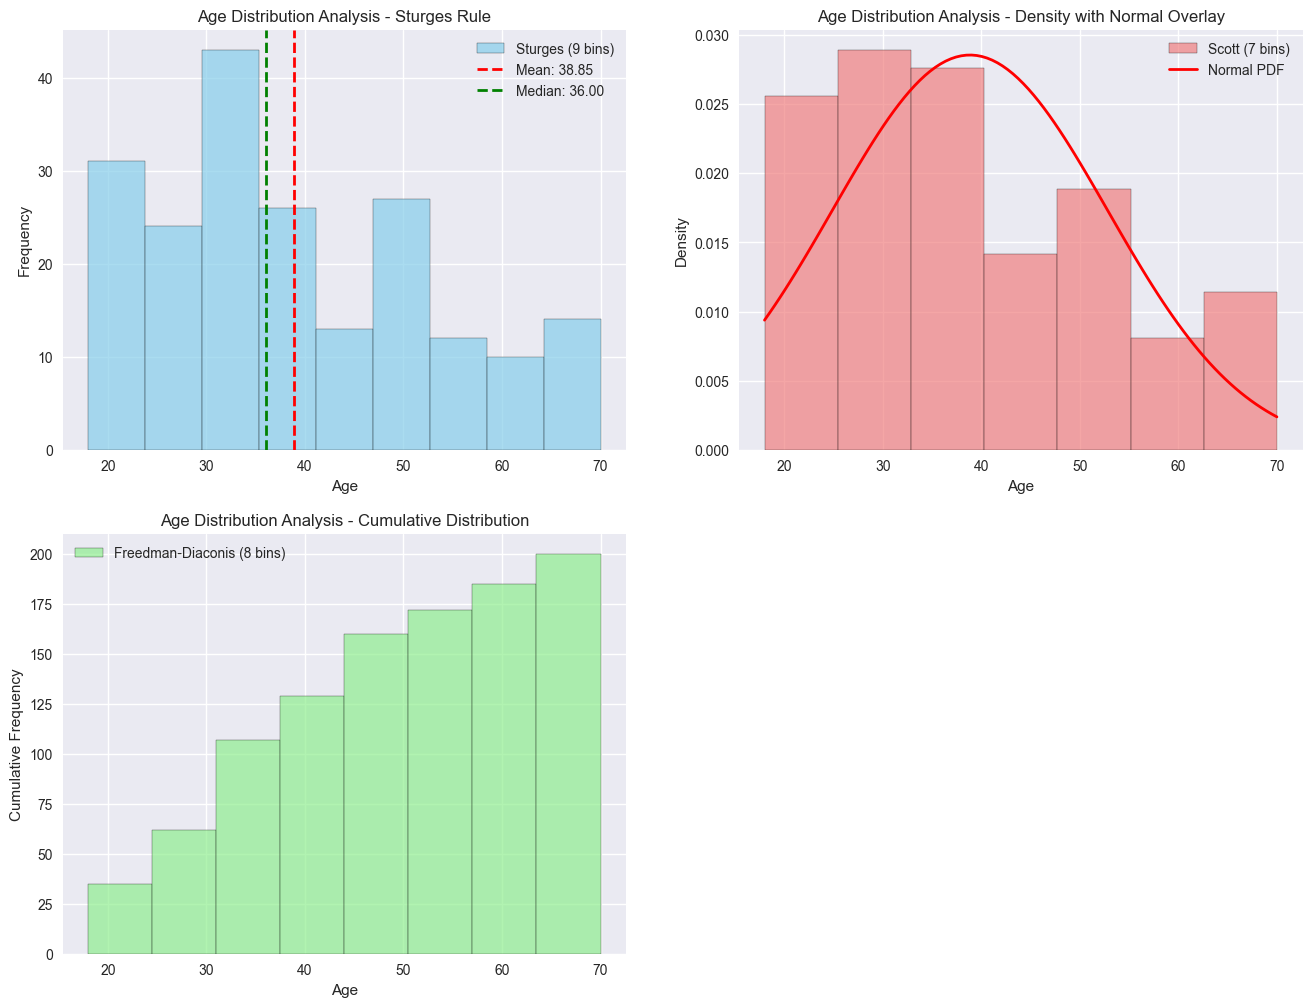

In [7]:
# Histogram Implementation with Mathematical Analysis

def analyze_histogram(data, column, title="Histogram Analysis"):
    """
    Comprehensive histogram analysis with mathematical foundations
    """
    values = data[column].dropna()
    n = len(values)
    
    # Mathematical bin selection methods
    # Sturges' rule
    bins_sturges = int(np.ceil(np.log2(n)) + 1)
    
    # Scott's rule
    sigma_hat = np.std(values, ddof=1)
    h_scott = 3.49 * sigma_hat * (n ** (-1/3))
    bins_scott = int(np.ceil((values.max() - values.min()) / h_scott))
    
    # Freedman-Diaconis rule
    q75, q25 = np.percentile(values, [75, 25])
    iqr = q75 - q25
    h_fd = 2 * iqr * (n ** (-1/3))
    bins_fd = int(np.ceil((values.max() - values.min()) / h_fd)) if iqr > 0 else bins_sturges
    
    # Statistical measures
    mean_val = np.mean(values)
    median_val = np.median(values)
    std_val = np.std(values, ddof=1)
    skewness = stats.skew(values)
    kurtosis = stats.kurtosis(values)
    
    # Normality tests
    shapiro_stat, shapiro_p = shapiro(values) if n <= 5000 else (np.nan, np.nan)
    ks_stat, ks_p = stats.kstest(values, 'norm', args=(mean_val, std_val))
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Histogram with different bin selection methods
    ax1.hist(values, bins=bins_sturges, alpha=0.7, color='skyblue', 
             edgecolor='black', label=f'Sturges ({bins_sturges} bins)')
    ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
    ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
    ax1.set_title(f'{title} - Sturges Rule')
    ax1.set_xlabel(column)
    ax1.set_ylabel('Frequency')
    ax1.legend()
    
    # 2. Density histogram with normal overlay
    ax2.hist(values, bins=bins_scott, density=True, alpha=0.7, color='lightcoral',
             edgecolor='black', label=f'Scott ({bins_scott} bins)')
    
    # Overlay normal distribution
    x_norm = np.linspace(values.min(), values.max(), 100)
    y_norm = stats.norm.pdf(x_norm, mean_val, std_val)
    ax2.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal PDF')
    
    ax2.set_title(f'{title} - Density with Normal Overlay')
    ax2.set_xlabel(column)
    ax2.set_ylabel('Density')
    ax2.legend()
    
    # 3. Cumulative histogram
    ax3.hist(values, bins=bins_fd, cumulative=True, alpha=0.7, color='lightgreen',
             edgecolor='black', label=f'Freedman-Diaconis ({bins_fd} bins)')
    ax3.set_title(f'{title} - Cumulative Distribution')
    ax3.set_xlabel(column)
    ax3.set_ylabel('Cumulative Frequency')
    ax3.legend()
    
    # 4. Mathematical Analysis Display
    ax4.axis('off')
    
    analysis_text = f"""
    MATHEMATICAL ANALYSIS:
    
    📊 Descriptive Statistics:
    • Mean (μ): {mean_val:.4f}
    • Median: {median_val:.4f}
    • Std Dev (σ): {std_val:.4f}
    • Skewness: {skewness:.4f}
    • Kurtosis: {kurtosis:.4f}
    
    📈 Bin Selection Methods:
    • Sturges' Rule: {bins_sturges} bins
    • Scott's Rule: {bins_scott} bins  
    • Freedman-Diaconis: {bins_fd} bins
    • Optimal h (Scott): {h_scott:.4f}
    
    🔬 Normality Tests:
    • Shapiro-Wilk: W={shapiro_stat:.4f}, p={shapiro_p:.4f}
    • Kolmogorov-Smirnov: D={ks_stat:.4f}, p={ks_p:.4f}
    • Normal Distribution: {'Rejected' if ks_p < 0.05 else 'Not Rejected'} (α=0.05)
    
    🎯 Distribution Properties:
    • Shape: {'Symmetric' if abs(skewness) < 0.5 else 'Right-skewed' if skewness > 0 else 'Left-skewed'}
    • Tail Behavior: {'Heavy tails' if kurtosis > 3 else 'Light tails' if kurtosis < 3 else 'Normal tails'}
    • Modality: {'Unimodal' if len(stats.find_peaks(np.histogram(values, bins=bins_sturges)[0])[0]) <= 1 else 'Multimodal'}
    """
    
    ax4.text(0.05, 0.95, analysis_text, transform=ax4.transAxes,
            fontsize=11, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'mean': mean_val,
        'median': median_val,
        'std': std_val,
        'skewness': skewness,
        'kurtosis': kurtosis,
        'bins_sturges': bins_sturges,
        'bins_scott': bins_scott,
        'bins_fd': bins_fd,
        'shapiro_stat': shapiro_stat,
        'shapiro_p': shapiro_p,
        'ks_stat': ks_stat,
        'ks_p': ks_p
    }

# Apply to numerical columns
numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numerical_cols:
    print(f"=== HISTOGRAM ANALYSIS: {col.upper()} ===")
    hist_analysis = analyze_histogram(df, col, f'{col} Distribution Analysis')
    print(f"Completed analysis for {col}")
    print("-" * 50)


## **2.2 Box Plots & Violin Plots - Quartile & Distribution Analysis**

### **📊 Mathematical Foundation:**

**Box Plots (Five-Number Summary):**
- **Quartiles**: \( Q_1, Q_2 (median), Q_3 \)
- **Interquartile Range**: \( IQR = Q_3 - Q_1 \)
- **Outlier Detection**: \( x < Q_1 - 1.5 \cdot IQR \) or \( x > Q_3 + 1.5 \cdot IQR \)
- **Whiskers**: \( [Q_1 - 1.5 \cdot IQR, Q_3 + 1.5 \cdot IQR] \)

**Violin Plots (KDE + Box Plot):**
- **Kernel Density**: \( \hat{f}(x) = \frac{1}{nh} \sum_{i=1}^{n} K\left(\frac{x-x_i}{h}\right) \)
- **Gaussian Kernel**: \( K(u) = \frac{1}{\sqrt{2\pi}} e^{-\frac{u^2}{2}} \)
- **Bandwidth Selection**: \( h = 1.06 \hat{\sigma} n^{-1/5} \) (Silverman's rule)

### **🔍 What These Plots Uniquely Detect:**

**Box Plots:**
1. **Quartile Distribution** - Data spread across quartiles
2. **Outlier Identification** - Points beyond whiskers
3. **Symmetry Assessment** - Median position relative to quartiles
4. **Robust Statistics** - Less sensitive to outliers than mean/std

**Violin Plots:**
1. **Distribution Shape** - Full density curve visualization
2. **Multimodality** - Multiple peaks in distribution
3. **Density Concentration** - Where data points cluster
4. **Tail Behavior** - Heavy vs. light tail characteristics

### **📈 Interpretation Guidelines:**

- **Box Width ∝ IQR**: Wider boxes indicate greater variability
- **Median Line Position**: Central = symmetric, off-center = skewed
- **Violin Width ∝ Density**: Wider sections have more data points
- **Outliers**: Individual points beyond whiskers require investigation


=== BOX & VIOLIN PLOT ANALYSIS: AGE ===


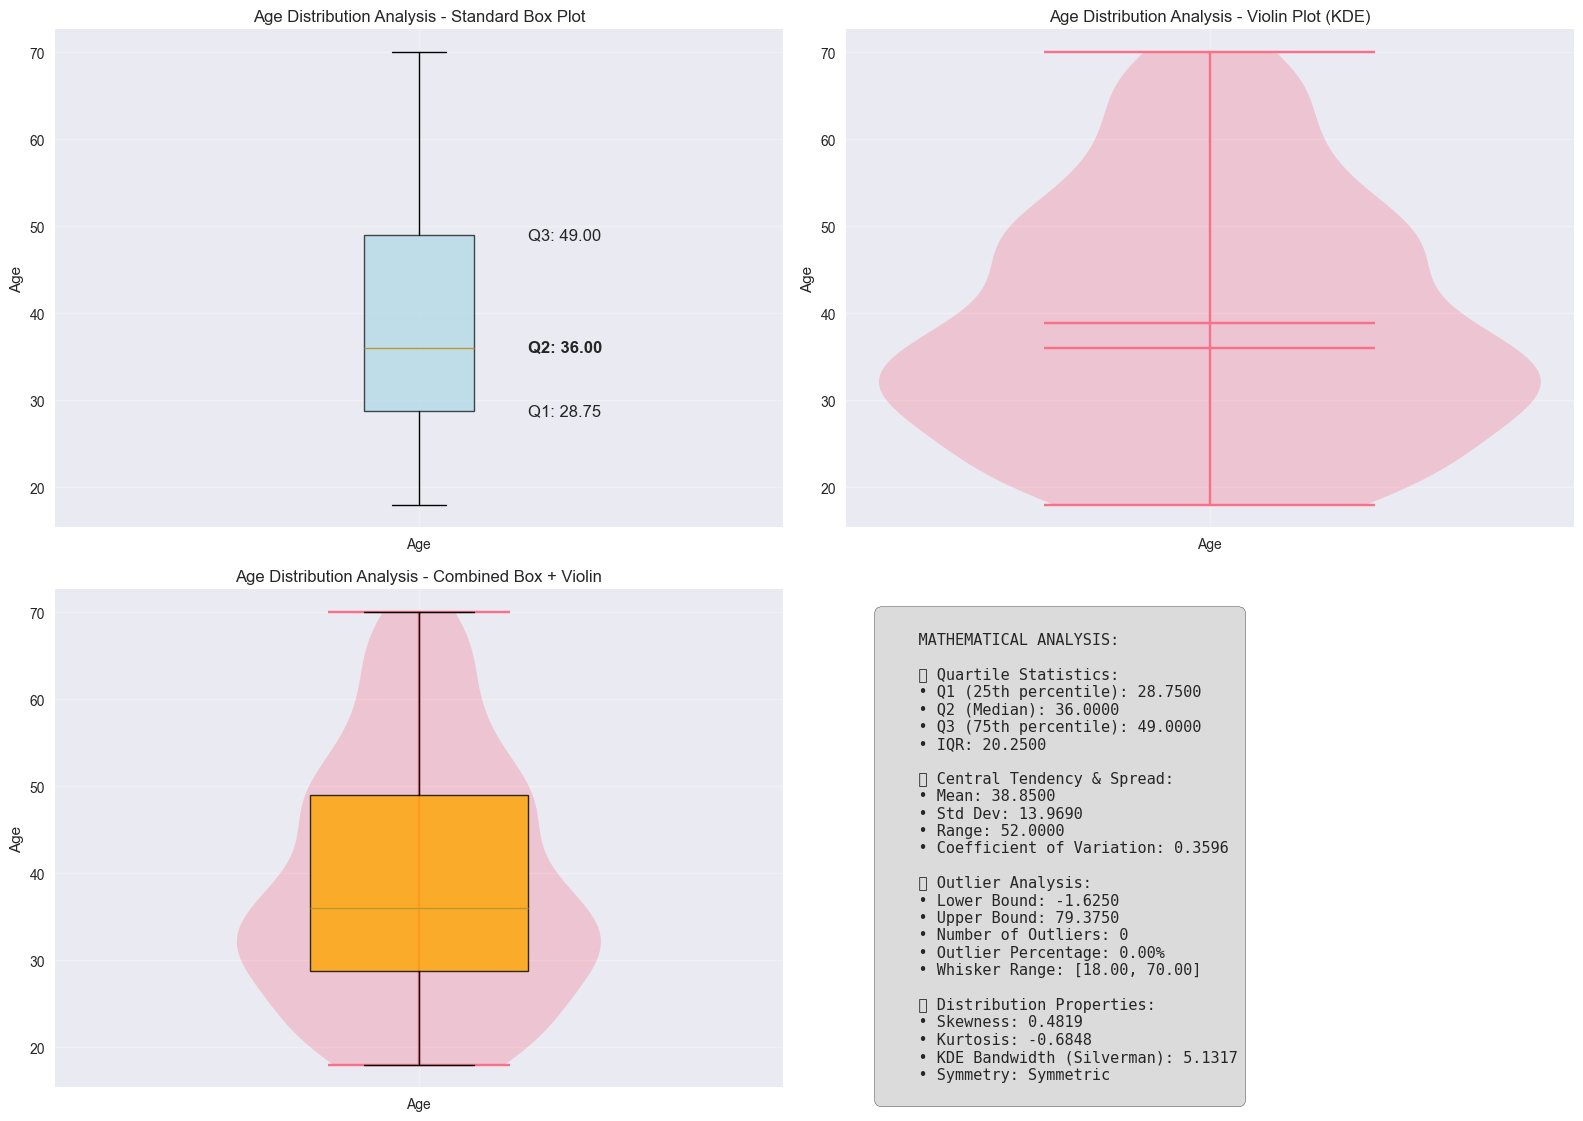

Completed analysis for Age
--------------------------------------------------
=== BOX & VIOLIN PLOT ANALYSIS: ANNUAL INCOME (K$) ===


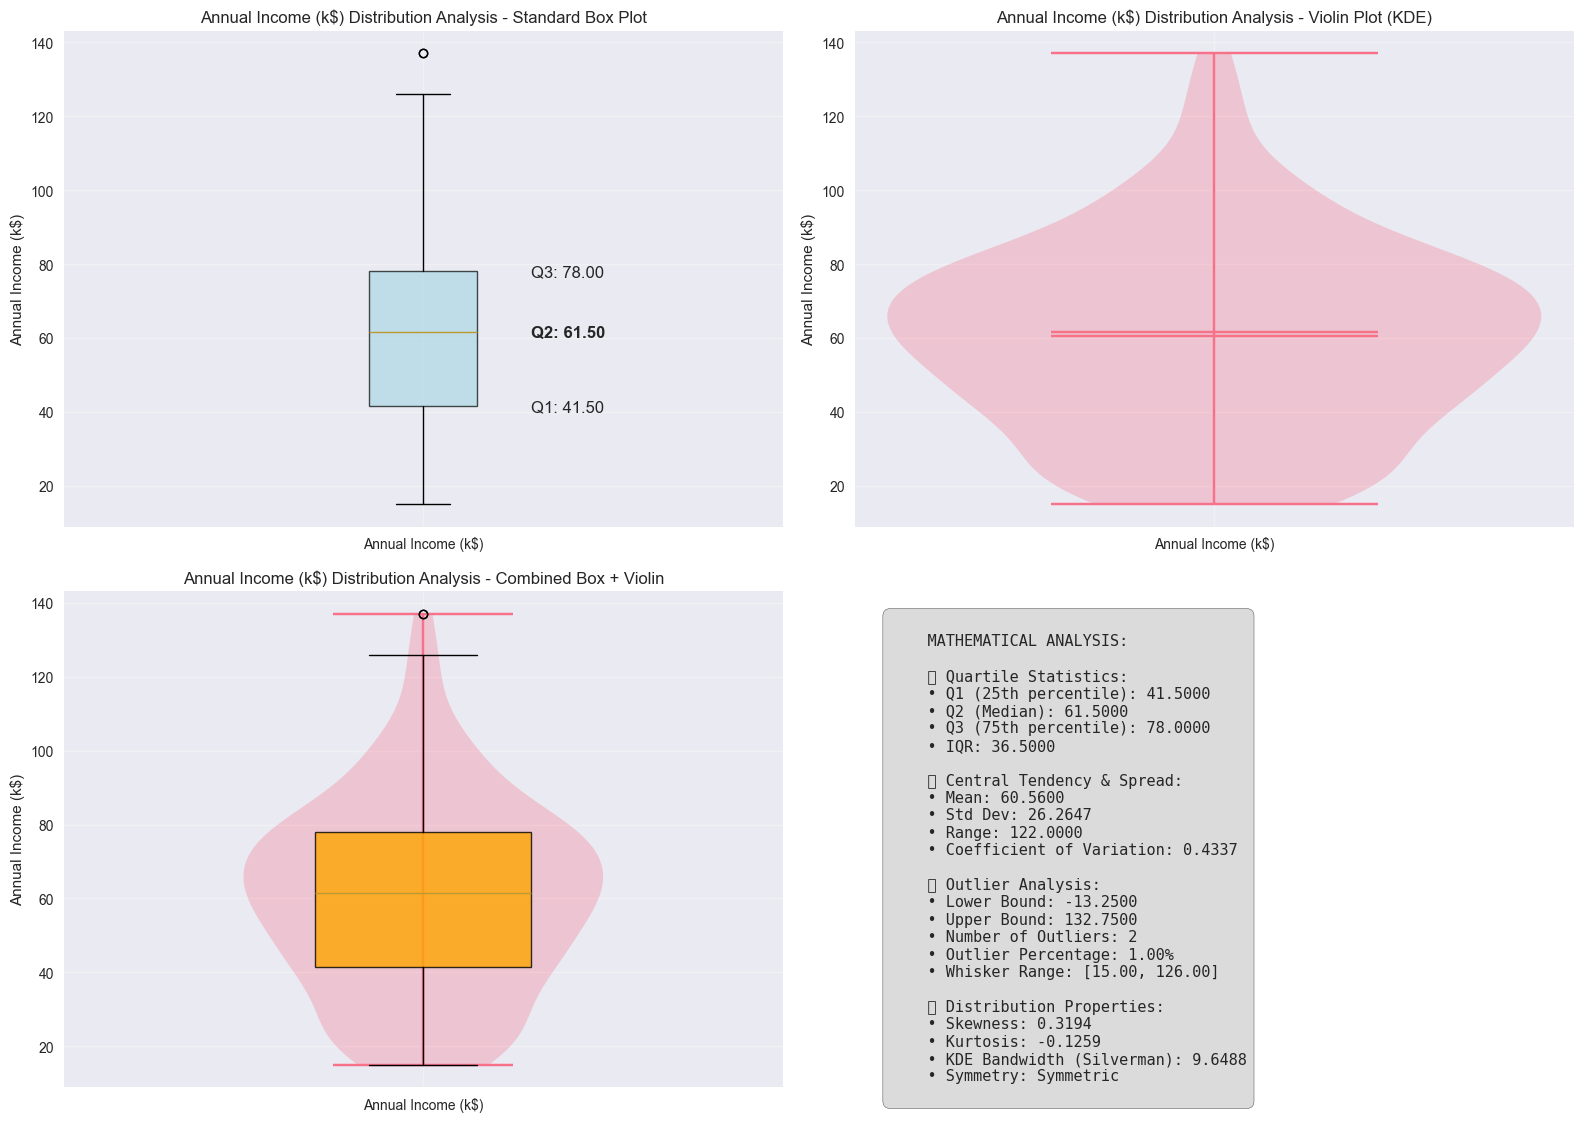

Completed analysis for Annual Income (k$)
--------------------------------------------------
=== BOX & VIOLIN PLOT ANALYSIS: SPENDING SCORE (1-100) ===


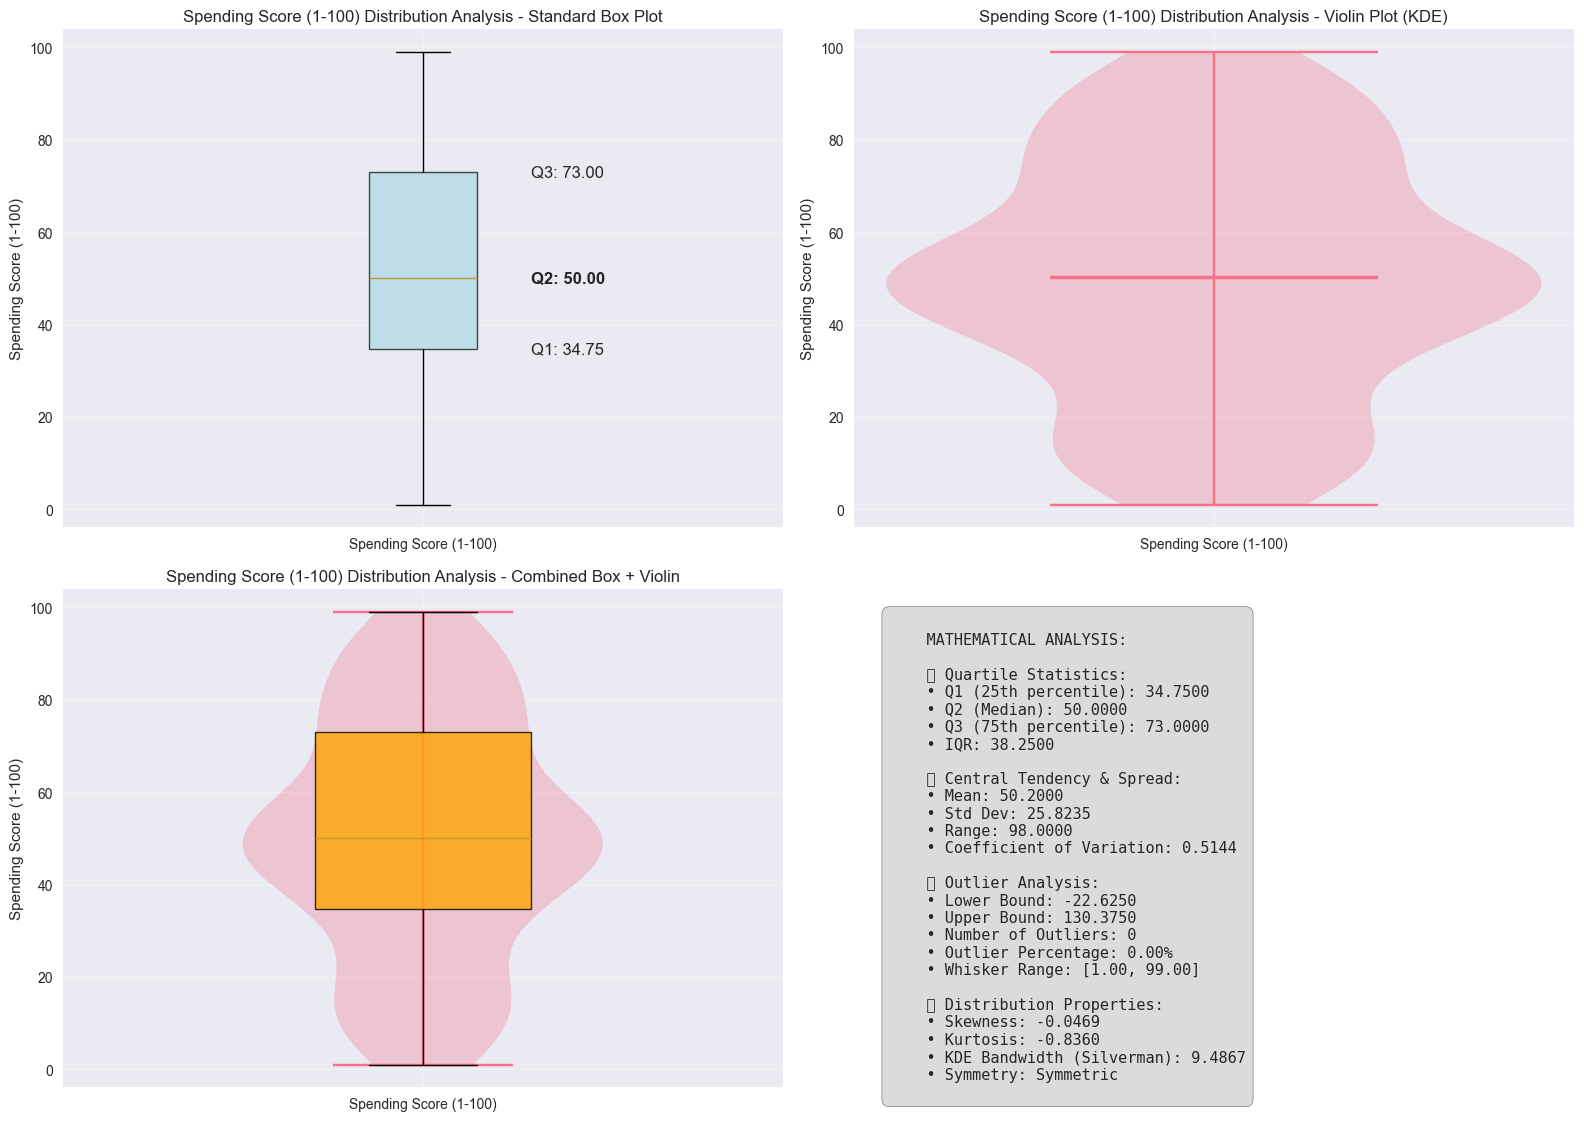

Completed analysis for Spending Score (1-100)
--------------------------------------------------


In [8]:
# Box Plot and Violin Plot Implementation with Mathematical Analysis

def analyze_box_violin_plots(data, column, title="Box & Violin Plot Analysis"):
    """
    Comprehensive box plot and violin plot analysis
    """
    values = data[column].dropna()
    n = len(values)
    
    # Calculate quartiles and statistics
    q1 = np.percentile(values, 25)
    q2 = np.percentile(values, 50)  # median
    q3 = np.percentile(values, 75)
    iqr = q3 - q1
    
    # Outlier bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = values[(values < lower_bound) | (values > upper_bound)]
    outlier_percentage = len(outliers) / n * 100
    
    # Whisker positions (actual data points within bounds)
    lower_whisker = values[values >= lower_bound].min()
    upper_whisker = values[values <= upper_bound].max()
    
    # Distribution shape measures
    mean_val = np.mean(values)
    std_val = np.std(values, ddof=1)
    skewness = stats.skew(values)
    kurtosis = stats.kurtosis(values)
    
    # Silverman's bandwidth for KDE
    h_silverman = 1.06 * std_val * (n ** (-1/5))
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Standard Box Plot
    box_data = ax1.boxplot(values, patch_artist=True, labels=[column])
    box_data['boxes'][0].set_facecolor('lightblue')
    box_data['boxes'][0].set_alpha(0.7)
    ax1.set_title(f'{title} - Standard Box Plot')
    ax1.set_ylabel(column)
    ax1.grid(True, alpha=0.3)
    
    # Add statistical annotations
    ax1.text(1.15, q2, f'Q2: {q2:.2f}', va='center', fontweight='bold')
    ax1.text(1.15, q1, f'Q1: {q1:.2f}', va='center')
    ax1.text(1.15, q3, f'Q3: {q3:.2f}', va='center')
    
    # 2. Violin Plot
    violin_parts = ax2.violinplot(values, positions=[1], showmeans=True, showmedians=True)
    ax2.set_title(f'{title} - Violin Plot (KDE)')
    ax2.set_ylabel(column)
    ax2.set_xticks([1])
    ax2.set_xticklabels([column])
    ax2.grid(True, alpha=0.3)
    
    # 3. Combined Box + Violin
    # Create violin plot
    violin_parts2 = ax3.violinplot(values, positions=[1], showmeans=False, showmedians=False)
    # Overlay box plot
    box_data2 = ax3.boxplot(values, positions=[1], widths=0.3, patch_artist=True)
    box_data2['boxes'][0].set_facecolor('orange')
    box_data2['boxes'][0].set_alpha(0.8)
    ax3.set_title(f'{title} - Combined Box + Violin')
    ax3.set_ylabel(column)
    ax3.set_xticks([1])
    ax3.set_xticklabels([column])
    ax3.grid(True, alpha=0.3)
    
    # 4. Mathematical Analysis Display
    ax4.axis('off')
    
    analysis_text = f"""
    MATHEMATICAL ANALYSIS:
    
    📊 Quartile Statistics:
    • Q1 (25th percentile): {q1:.4f}
    • Q2 (Median): {q2:.4f}
    • Q3 (75th percentile): {q3:.4f}
    • IQR: {iqr:.4f}
    
    📈 Central Tendency & Spread:
    • Mean: {mean_val:.4f}
    • Std Dev: {std_val:.4f}
    • Range: {values.max() - values.min():.4f}
    • Coefficient of Variation: {std_val/mean_val:.4f}
    
    🔬 Outlier Analysis:
    • Lower Bound: {lower_bound:.4f}
    • Upper Bound: {upper_bound:.4f}
    • Number of Outliers: {len(outliers)}
    • Outlier Percentage: {outlier_percentage:.2f}%
    • Whisker Range: [{lower_whisker:.2f}, {upper_whisker:.2f}]
    
    🎯 Distribution Properties:
    • Skewness: {skewness:.4f}
    • Kurtosis: {kurtosis:.4f}
    • KDE Bandwidth (Silverman): {h_silverman:.4f}
    • Symmetry: {'Symmetric' if abs(skewness) < 0.5 else 'Asymmetric'}
    """
    
    ax4.text(0.05, 0.95, analysis_text, transform=ax4.transAxes,
            fontsize=11, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'q1': q1, 'q2': q2, 'q3': q3, 'iqr': iqr,
        'outliers': outliers, 'outlier_percentage': outlier_percentage,
        'lower_bound': lower_bound, 'upper_bound': upper_bound,
        'skewness': skewness, 'kurtosis': kurtosis,
        'h_silverman': h_silverman
    }

# Apply to numerical columns
for col in numerical_cols:
    print(f"=== BOX & VIOLIN PLOT ANALYSIS: {col.upper()} ===")
    box_violin_analysis = analyze_box_violin_plots(df, col, f'{col} Distribution Analysis')
    print(f"Completed analysis for {col}")
    print("-" * 50)


# **SECTION 3: RELATIONSHIP VISUALIZATIONS**

## **3.1 Scatter Plots & Correlation Analysis**

### **📊 Mathematical Foundation:**

**Pearson Correlation Coefficient:**
\[ r_{xy} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2 \sum_{i=1}^{n}(y_i - \bar{y})^2}} \]

**Spearman Rank Correlation:**
\[ \rho = 1 - \frac{6\sum_{i=1}^{n}d_i^2}{n(n^2-1)} \]
where \( d_i \) is the difference between ranks of \( x_i \) and \( y_i \)

**Linear Regression:**
- **Slope**: \( \beta_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2} \)
- **Intercept**: \( \beta_0 = \bar{y} - \beta_1\bar{x} \)
- **R-squared**: \( R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST} \)

### **🔍 What Scatter Plots Uniquely Detect:**

1. **Linear Relationships** - Straight-line patterns indicating correlation
2. **Non-linear Patterns** - Curved, parabolic, or other mathematical relationships
3. **Outliers & Influential Points** - Points that deviate from main pattern
4. **Heteroscedasticity** - Changing variance across the range
5. **Clusters & Groups** - Natural groupings in the data

### **📈 Interpretation Guidelines:**

- **Point Density**: Darker regions indicate higher concentration
- **Trend Direction**: Positive slope = positive correlation
- **Scatter Width**: Narrower scatter = stronger relationship
- **Outlier Impact**: Points far from trend line may be influential


=== SCATTER PLOT ANALYSIS: AGE vs ANNUAL INCOME (K$) ===


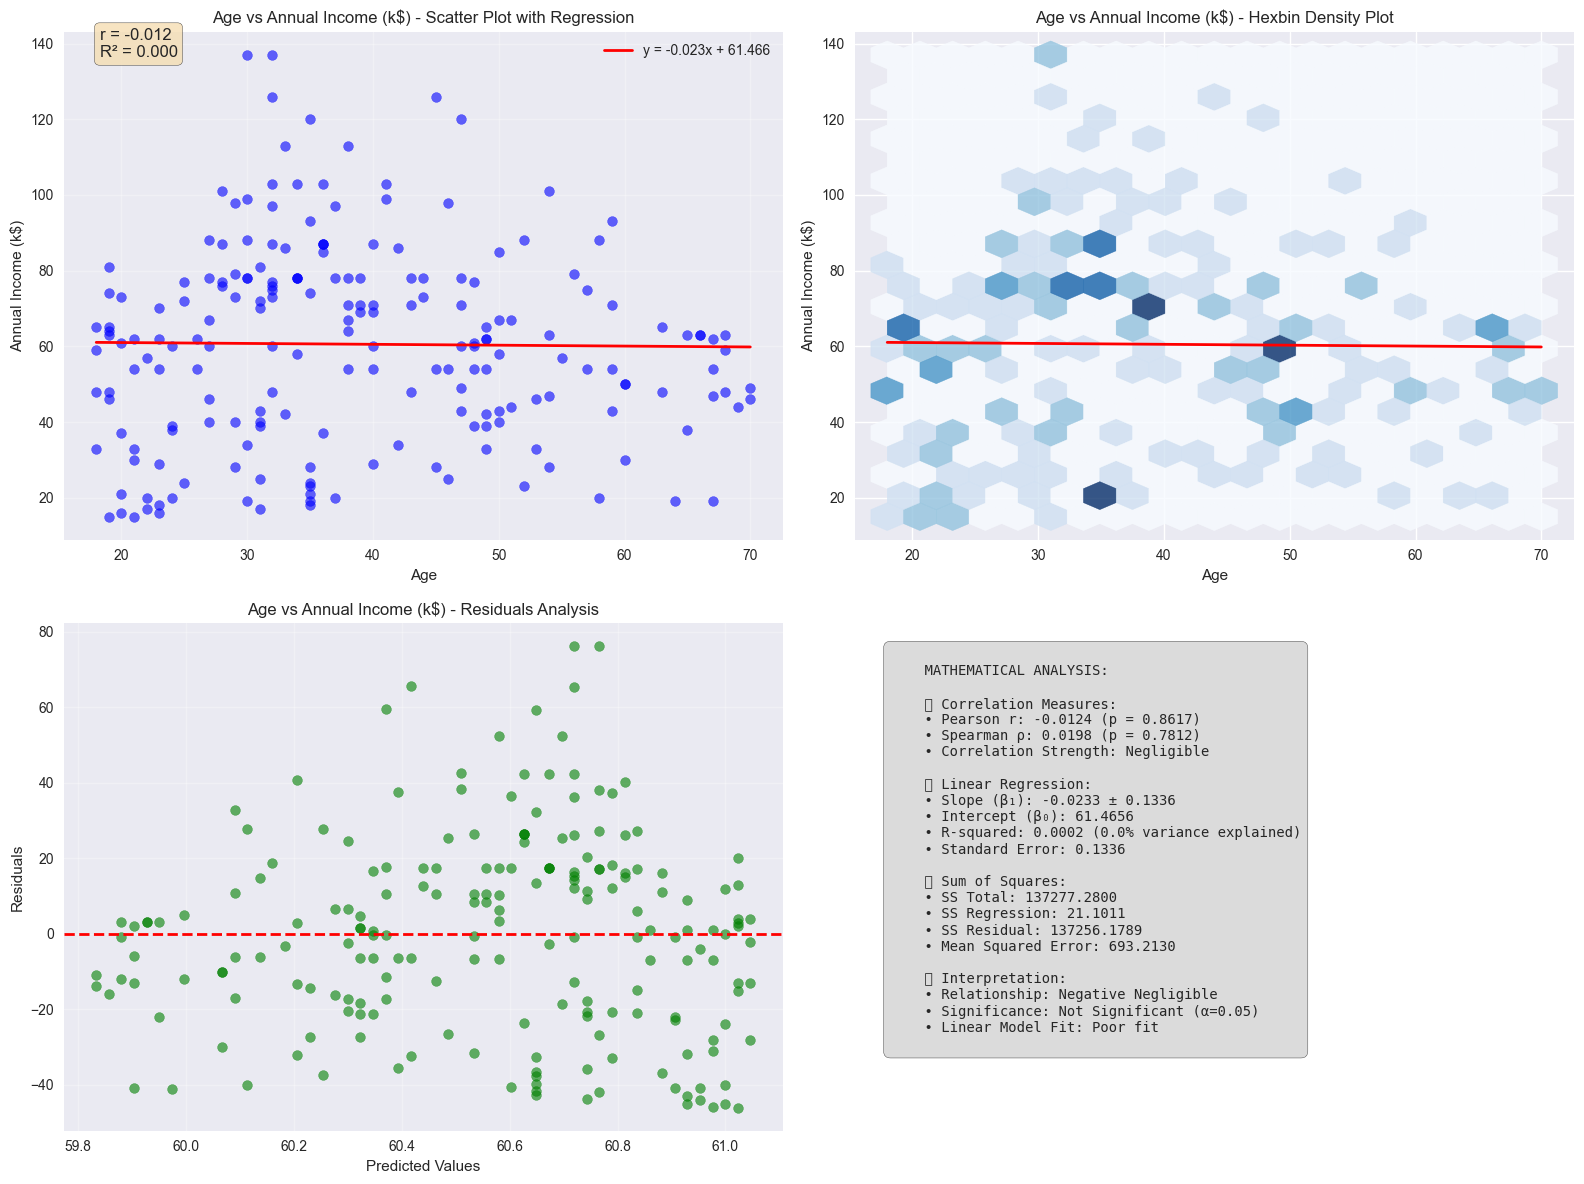

Completed analysis for Age vs Annual Income (k$)
----------------------------------------------------------------------
=== SCATTER PLOT ANALYSIS: AGE vs SPENDING SCORE (1-100) ===


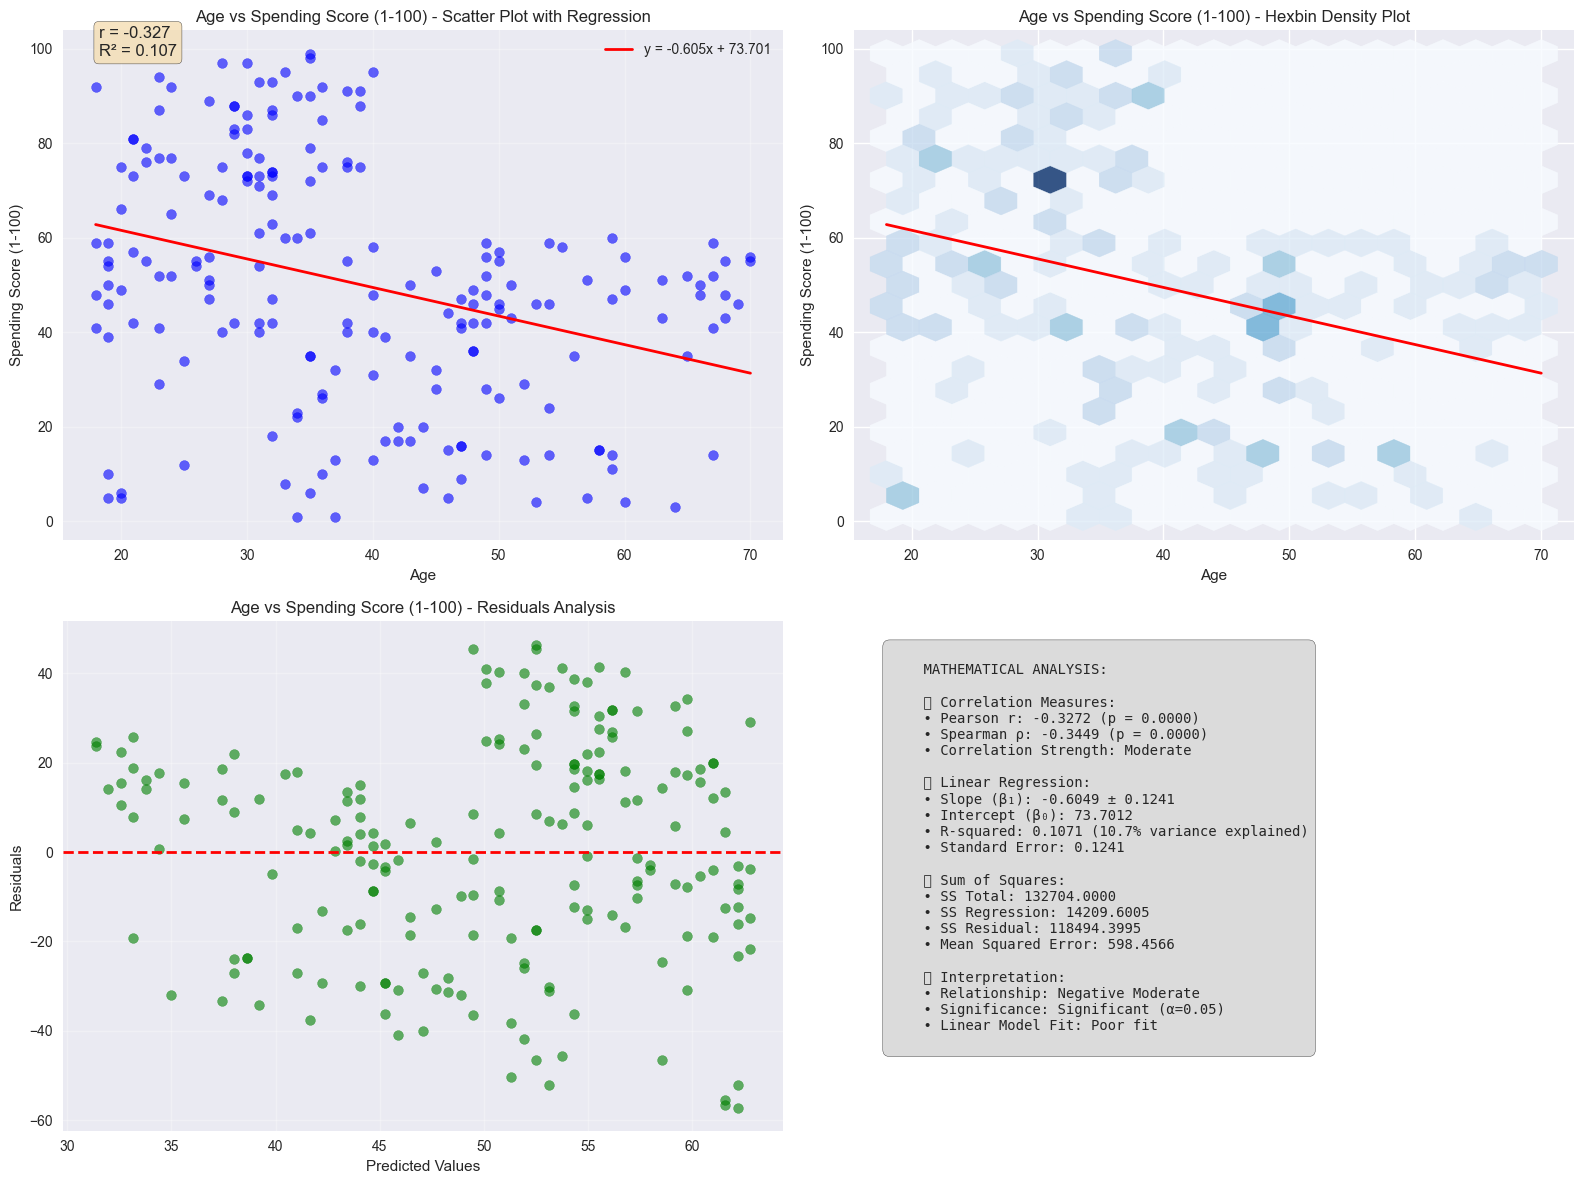

Completed analysis for Age vs Spending Score (1-100)
----------------------------------------------------------------------
=== SCATTER PLOT ANALYSIS: ANNUAL INCOME (K$) vs SPENDING SCORE (1-100) ===


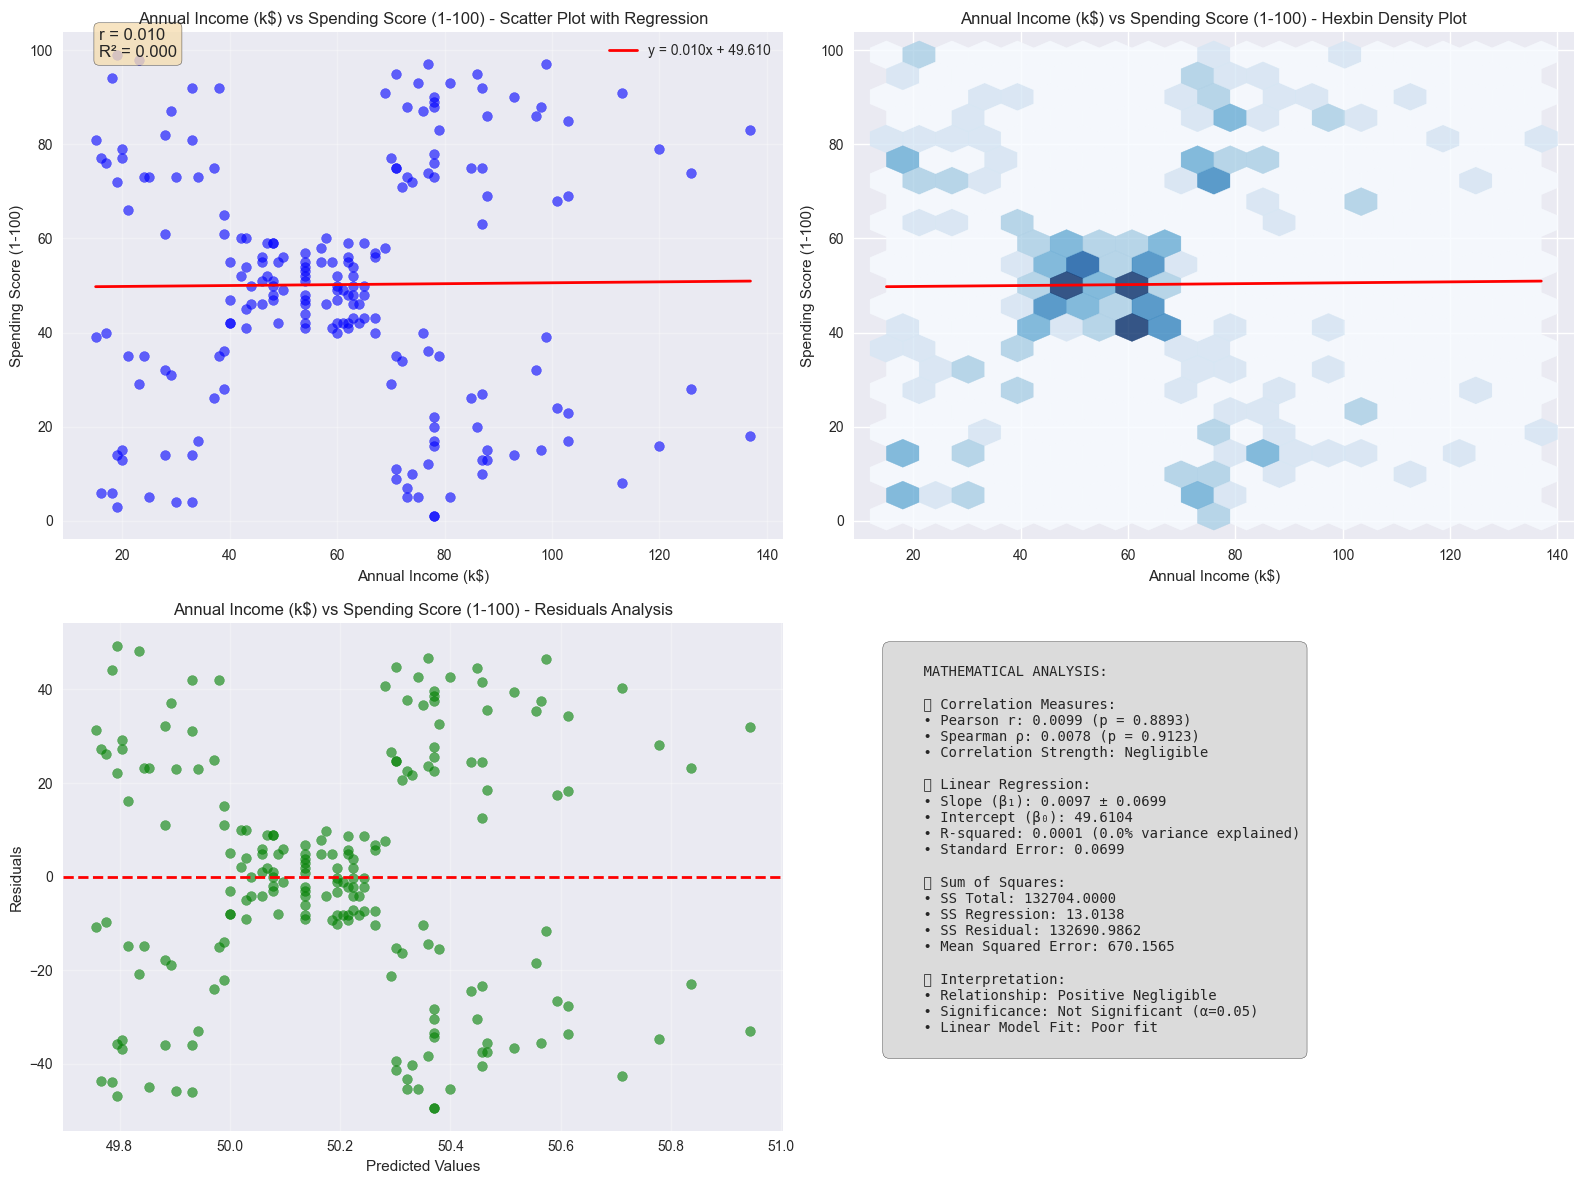

Completed analysis for Annual Income (k$) vs Spending Score (1-100)
----------------------------------------------------------------------


In [9]:
# Scatter Plot and Correlation Analysis Implementation

def analyze_scatter_correlation(data, x_col, y_col, title="Scatter Plot Analysis"):
    """
    Comprehensive scatter plot and correlation analysis
    """
    # Clean data
    clean_data = data[[x_col, y_col]].dropna()
    x = clean_data[x_col].values
    y = clean_data[y_col].values
    n = len(x)
    
    # Correlation measures
    pearson_r, pearson_p = stats.pearsonr(x, y)
    spearman_rho, spearman_p = stats.spearmanr(x, y)
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    r_squared = r_value ** 2
    
    # Regression line
    x_line = np.linspace(x.min(), x.max(), 100)
    y_line = slope * x_line + intercept
    
    # Residuals analysis
    y_pred = slope * x + intercept
    residuals = y - y_pred
    
    # Statistical measures
    x_mean, y_mean = np.mean(x), np.mean(y)
    x_std, y_std = np.std(x, ddof=1), np.std(y, ddof=1)
    
    # Sum of squares
    ss_total = np.sum((y - y_mean) ** 2)
    ss_residual = np.sum(residuals ** 2)
    ss_regression = ss_total - ss_residual
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Basic Scatter Plot with Regression Line
    ax1.scatter(x, y, alpha=0.6, color='blue', s=50)
    ax1.plot(x_line, y_line, 'r-', linewidth=2, label=f'y = {slope:.3f}x + {intercept:.3f}')
    ax1.set_xlabel(x_col)
    ax1.set_ylabel(y_col)
    ax1.set_title(f'{title} - Scatter Plot with Regression')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add correlation coefficient
    ax1.text(0.05, 0.95, f'r = {pearson_r:.3f}\nR² = {r_squared:.3f}', 
            transform=ax1.transAxes, bbox=dict(boxstyle="round", facecolor='wheat', alpha=0.8))
    
    # 2. Scatter Plot with Density
    ax2.hexbin(x, y, gridsize=20, cmap='Blues', alpha=0.8)
    ax2.plot(x_line, y_line, 'r-', linewidth=2)
    ax2.set_xlabel(x_col)
    ax2.set_ylabel(y_col)
    ax2.set_title(f'{title} - Hexbin Density Plot')
    
    # 3. Residuals Plot
    ax3.scatter(y_pred, residuals, alpha=0.6, color='green', s=50)
    ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
    ax3.set_xlabel('Predicted Values')
    ax3.set_ylabel('Residuals')
    ax3.set_title(f'{title} - Residuals Analysis')
    ax3.grid(True, alpha=0.3)
    
    # 4. Mathematical Analysis Display
    ax4.axis('off')
    
    analysis_text = f"""
    MATHEMATICAL ANALYSIS:
    
    📊 Correlation Measures:
    • Pearson r: {pearson_r:.4f} (p = {pearson_p:.4f})
    • Spearman ρ: {spearman_rho:.4f} (p = {spearman_p:.4f})
    • Correlation Strength: {interpret_correlation(abs(pearson_r))}
    
    📈 Linear Regression:
    • Slope (β₁): {slope:.4f} ± {std_err:.4f}
    • Intercept (β₀): {intercept:.4f}
    • R-squared: {r_squared:.4f} ({r_squared*100:.1f}% variance explained)
    • Standard Error: {std_err:.4f}
    
    🔬 Sum of Squares:
    • SS Total: {ss_total:.4f}
    • SS Regression: {ss_regression:.4f}
    • SS Residual: {ss_residual:.4f}
    • Mean Squared Error: {ss_residual/(n-2):.4f}
    
    🎯 Interpretation:
    • Relationship: {interpret_relationship(pearson_r)}
    • Significance: {'Significant' if pearson_p < 0.05 else 'Not Significant'} (α=0.05)
    • Linear Model Fit: {interpret_r_squared(r_squared)}
    """
    
    ax4.text(0.05, 0.95, analysis_text, transform=ax4.transAxes,
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.tight_layout()
    plt.show()
    
    return {
        'pearson_r': pearson_r, 'pearson_p': pearson_p,
        'spearman_rho': spearman_rho, 'spearman_p': spearman_p,
        'slope': slope, 'intercept': intercept, 'r_squared': r_squared,
        'residuals': residuals, 'std_err': std_err
    }

def interpret_correlation(r):
    """Interpret correlation strength"""
    if r < 0.1:
        return "Negligible"
    elif r < 0.3:
        return "Weak"
    elif r < 0.5:
        return "Moderate"
    elif r < 0.7:
        return "Strong"
    else:
        return "Very Strong"

def interpret_relationship(r):
    """Interpret relationship direction and strength"""
    direction = "Positive" if r > 0 else "Negative"
    strength = interpret_correlation(abs(r))
    return f"{direction} {strength}"

def interpret_r_squared(r2):
    """Interpret R-squared value"""
    if r2 < 0.25:
        return "Poor fit"
    elif r2 < 0.5:
        return "Moderate fit"
    elif r2 < 0.75:
        return "Good fit"
    else:
        return "Excellent fit"

# Analyze all pairs of numerical variables
numerical_pairs = [
    ('Age', 'Annual Income (k$)'),
    ('Age', 'Spending Score (1-100)'),
    ('Annual Income (k$)', 'Spending Score (1-100)')
]

for x_col, y_col in numerical_pairs:
    print(f"=== SCATTER PLOT ANALYSIS: {x_col.upper()} vs {y_col.upper()} ===")
    scatter_analysis = analyze_scatter_correlation(df, x_col, y_col, 
                                                  f'{x_col} vs {y_col}')
    print(f"Completed analysis for {x_col} vs {y_col}")
    print("-" * 70)


# **SECTION 3: ADVANCED VISUALIZATIONS**

## **3.1 Heatmaps - Correlation & Contingency Analysis**

### **📊 Mathematical Foundation:**

**Correlation Heatmaps:**
- **Pearson Matrix**: \( R_{ij} = \frac{\text{Cov}(X_i, X_j)}{\sigma_{X_i} \sigma_{X_j}} \)
- **Color Encoding**: Intensity mapping from correlation values [-1, 1] to color scale
- **Symmetric Property**: \( R_{ij} = R_{ji} \), diagonal elements = 1

**Contingency Heatmaps:**
- **Chi-square Components**: \( \frac{(O_{ij} - E_{ij})^2}{E_{ij}} \) for each cell
- **Expected Frequencies**: \( E_{ij} = \frac{R_i \times C_j}{N} \)
- **Standardized Residuals**: \( \frac{O_{ij} - E_{ij}}{\sqrt{E_{ij}}} \)

### **🔍 What Heatmaps Uniquely Detect:**

1. **Correlation Patterns** - Systematic relationships across multiple variables
2. **Multicollinearity** - High correlations between predictor variables
3. **Variable Clustering** - Groups of highly correlated variables
4. **Association Strength** - Magnitude of relationships through color intensity
5. **Contingency Dependencies** - Cross-tabulation patterns in categorical data

### **📈 Interpretation Guidelines:**

- **Color Intensity ∝ Correlation Strength**: Darker colors indicate stronger relationships
- **Diagonal Symmetry**: Correlation matrices are symmetric around diagonal
- **Color Scale**: Red/blue for positive/negative, white for zero correlation
- **Clustering**: Group variables by correlation patterns for insight


=== HEATMAP ANALYSIS: CORRELATION & CONTINGENCY ===


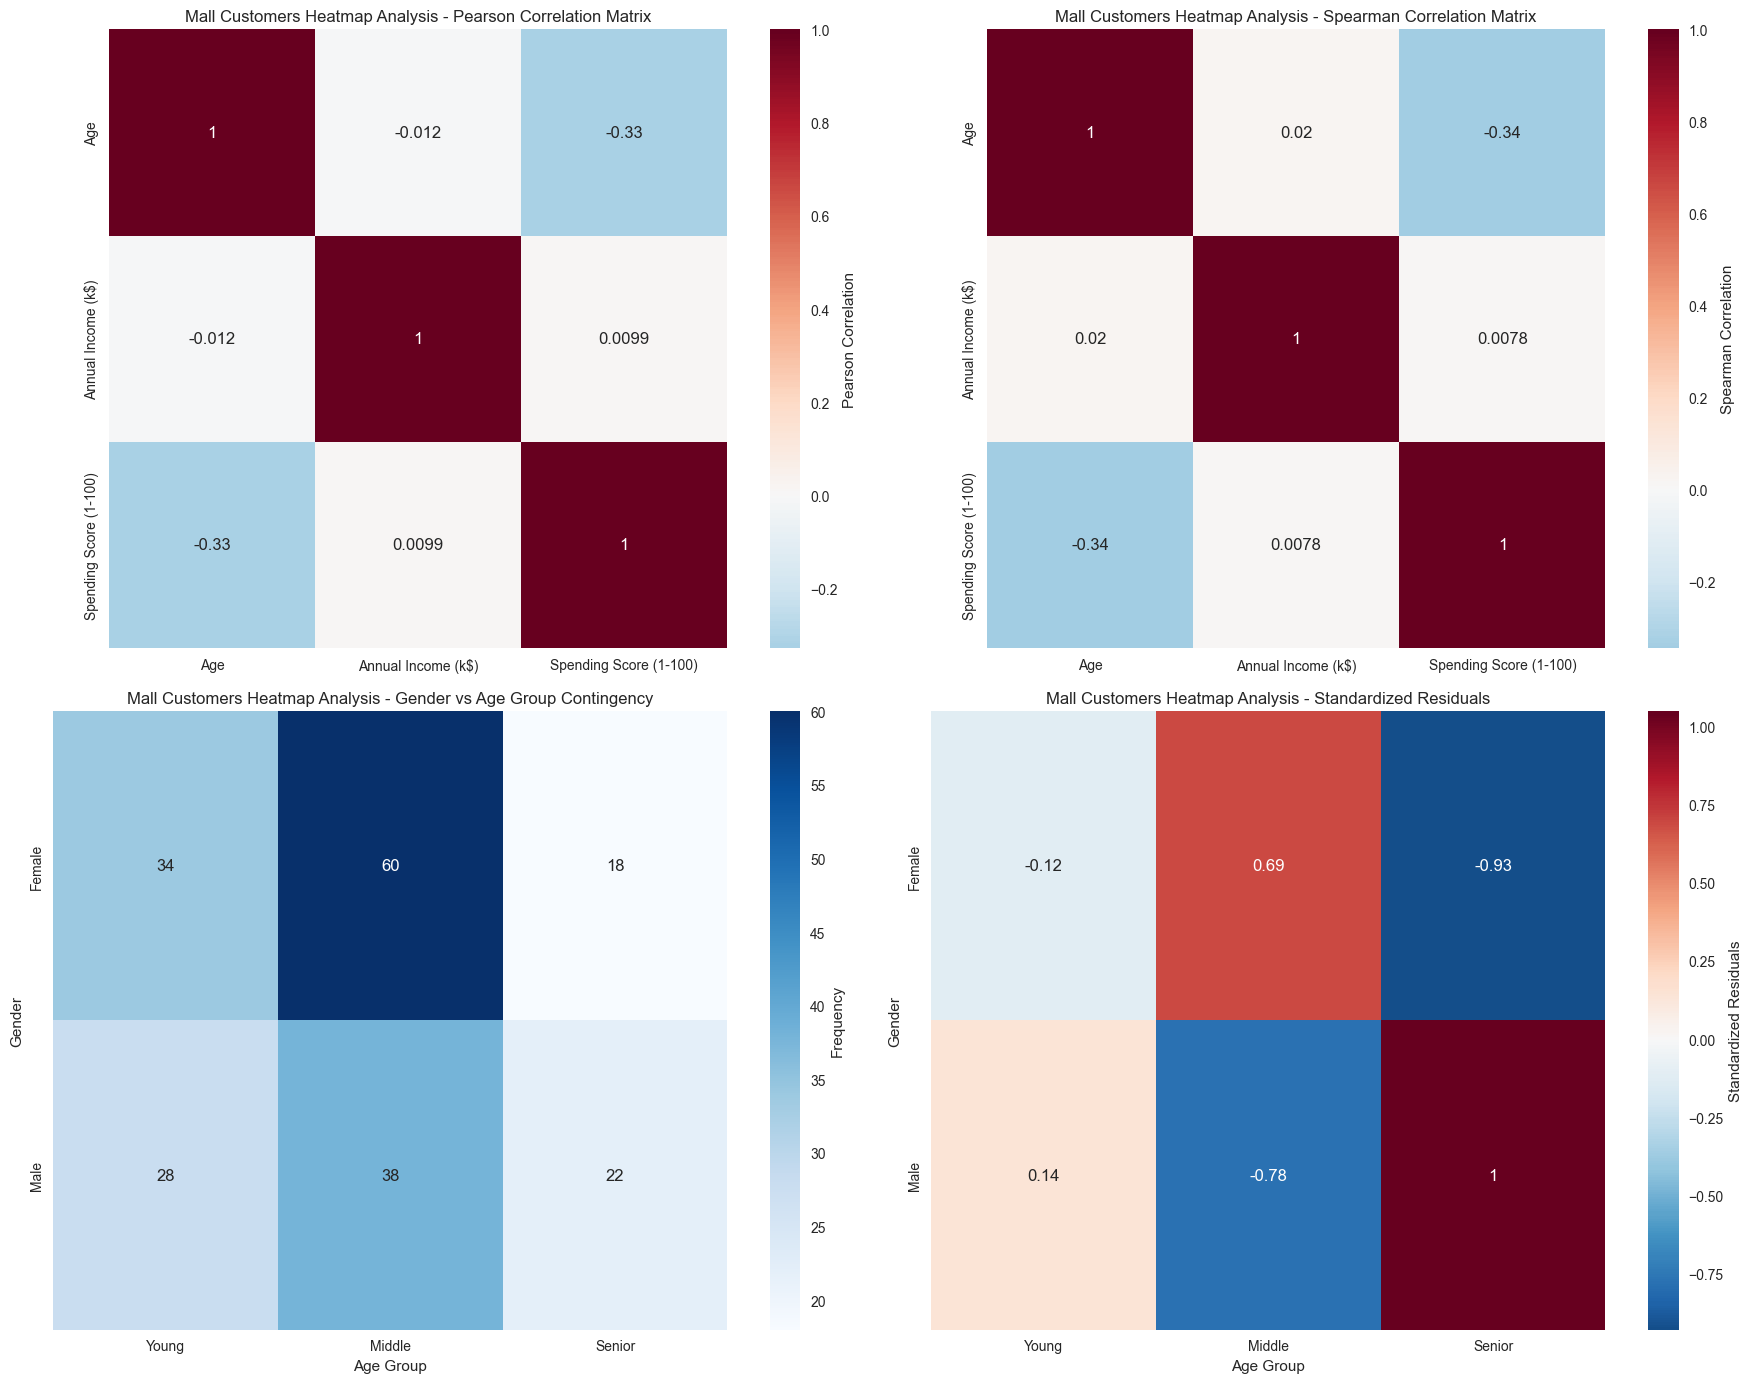

🔬 HEATMAP MATHEMATICAL ANALYSIS:

📊 Correlation Matrix Properties:
• Pearson Correlations Range: [-0.327, 1.000]
• Spearman Correlations Range: [-0.345, 1.000]
• Strongest Pearson Correlation: 0.327
• Strongest Spearman Correlation: 0.345

🔬 Contingency Analysis:
• Chi-square Statistic: 3.0838
• p-value: 0.2140
• Degrees of Freedom: 2
• Independence Test: Not Rejected (α=0.05)

📈 Residuals Analysis:
• Max Positive Residual: 1.049
• Max Negative Residual: -0.930
• Cells with |residual| > 2: 0


In [10]:
# Heatmap Implementation with Mathematical Analysis

def analyze_heatmaps(data, title="Heatmap Analysis"):
    """
    Comprehensive heatmap analysis including correlation and contingency tables
    """
    # Prepare numerical data for correlation heatmap
    numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    numerical_data = data[numerical_cols]
    
    # Calculate correlation matrices
    pearson_corr = numerical_data.corr(method='pearson')
    spearman_corr = numerical_data.corr(method='spearman')
    
    # Create categorical variables for contingency analysis
    data_copy = data.copy()
    data_copy['Age_Group'] = pd.cut(data_copy['Age'], 
                                   bins=[0, 30, 50, 100], 
                                   labels=['Young', 'Middle', 'Senior'])
    data_copy['Income_Level'] = pd.cut(data_copy['Annual Income (k$)'], 
                                      bins=[0, 50, 100, 150], 
                                      labels=['Low', 'Medium', 'High'])
    
    # Contingency table
    contingency_table = pd.crosstab(data_copy['Gender'], data_copy['Age_Group'])
    
    # Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    
    # Standardized residuals
    residuals = (contingency_table - expected) / np.sqrt(expected)
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
    
    # 1. Pearson Correlation Heatmap
    sns.heatmap(pearson_corr, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=ax1, cbar_kws={'label': 'Pearson Correlation'})
    ax1.set_title(f'{title} - Pearson Correlation Matrix')
    
    # 2. Spearman Correlation Heatmap
    sns.heatmap(spearman_corr, annot=True, cmap='RdBu_r', center=0, 
                square=True, ax=ax2, cbar_kws={'label': 'Spearman Correlation'})
    ax2.set_title(f'{title} - Spearman Correlation Matrix')
    
    # 3. Contingency Table Heatmap
    sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues', 
                ax=ax3, cbar_kws={'label': 'Frequency'})
    ax3.set_title(f'{title} - Gender vs Age Group Contingency')
    ax3.set_ylabel('Gender')
    ax3.set_xlabel('Age Group')
    
    # 4. Standardized Residuals Heatmap
    sns.heatmap(residuals, annot=True, cmap='RdBu_r', center=0, 
                ax=ax4, cbar_kws={'label': 'Standardized Residuals'})
    ax4.set_title(f'{title} - Standardized Residuals')
    ax4.set_ylabel('Gender')
    ax4.set_xlabel('Age Group')
    
    plt.tight_layout()
    plt.show()
    
    # Mathematical Analysis
    print("🔬 HEATMAP MATHEMATICAL ANALYSIS:")
    print("=" * 50)
    print(f"\n📊 Correlation Matrix Properties:")
    print(f"• Pearson Correlations Range: [{pearson_corr.min().min():.3f}, {pearson_corr.max().max():.3f}]")
    print(f"• Spearman Correlations Range: [{spearman_corr.min().min():.3f}, {spearman_corr.max().max():.3f}]")
    print(f"• Strongest Pearson Correlation: {pearson_corr.abs().unstack().sort_values(ascending=False).iloc[3]:.3f}")
    print(f"• Strongest Spearman Correlation: {spearman_corr.abs().unstack().sort_values(ascending=False).iloc[3]:.3f}")
    
    print(f"\n🔬 Contingency Analysis:")
    print(f"• Chi-square Statistic: {chi2_stat:.4f}")
    print(f"• p-value: {p_value:.4f}")
    print(f"• Degrees of Freedom: {dof}")
    print(f"• Independence Test: {'Rejected' if p_value < 0.05 else 'Not Rejected'} (α=0.05)")
    
    print(f"\n📈 Residuals Analysis:")
    print(f"• Max Positive Residual: {residuals.max().max():.3f}")
    print(f"• Max Negative Residual: {residuals.min().min():.3f}")
    print(f"• Cells with |residual| > 2: {(residuals.abs() > 2).sum().sum()}")
    
    return {
        'pearson_corr': pearson_corr,
        'spearman_corr': spearman_corr,
        'contingency_table': contingency_table,
        'chi2_stat': chi2_stat,
        'p_value': p_value,
        'residuals': residuals
    }

# Apply heatmap analysis
print("=== HEATMAP ANALYSIS: CORRELATION & CONTINGENCY ===")
heatmap_analysis = analyze_heatmaps(df, 'Mall Customers Heatmap Analysis')


## **3.2 Stacked & Grouped Bar Charts - Multi-dimensional Categorical Analysis**

### **📊 Mathematical Foundation:**

**Stacked Bar Charts:**
- **Total Height**: \( H_i = \sum_{j=1}^{k} f_{ij} \) where \( f_{ij} \) is frequency of category j in group i
- **Proportional Stacking**: \( p_{ij} = \frac{f_{ij}}{\sum_{j=1}^{k} f_{ij}} \)
- **Shannon Diversity**: \( H'_i = -\sum_{j=1}^{k} p_{ij} \log(p_{ij}) \) for each group

**Grouped Bar Charts:**
- **Side-by-side Comparison**: Bars grouped by categorical variable
- **Effect Size**: \( d = \frac{\bar{x}_1 - \bar{x}_2}{s_{pooled}} \) for comparing group means
- **ANOVA F-statistic**: \( F = \frac{MS_{between}}{MS_{within}} \) for multiple group comparison

### **🔍 What These Charts Uniquely Detect:**

**Stacked Bar Charts:**
1. **Compositional Analysis** - Part-to-whole relationships within groups
2. **Group Size Comparison** - Total frequencies across categories
3. **Internal Distribution** - How subcategories distribute within each group
4. **Proportional Trends** - Changes in composition across groups

**Grouped Bar Charts:**
1. **Direct Comparison** - Side-by-side category comparisons
2. **Interaction Effects** - How one categorical variable affects another
3. **Group Differences** - Statistical differences between categories
4. **Pattern Recognition** - Systematic differences across groups

### **📈 Interpretation Guidelines:**

- **Stack Height ∝ Total Frequency**: Taller stacks indicate larger groups
- **Stack Segments ∝ Subcategory Frequency**: Segment size shows contribution
- **Group Spacing**: Clear separation between different categorical groups
- **Color Consistency**: Same subcategories use consistent colors across groups


=== STACKED & GROUPED BAR ANALYSIS ===


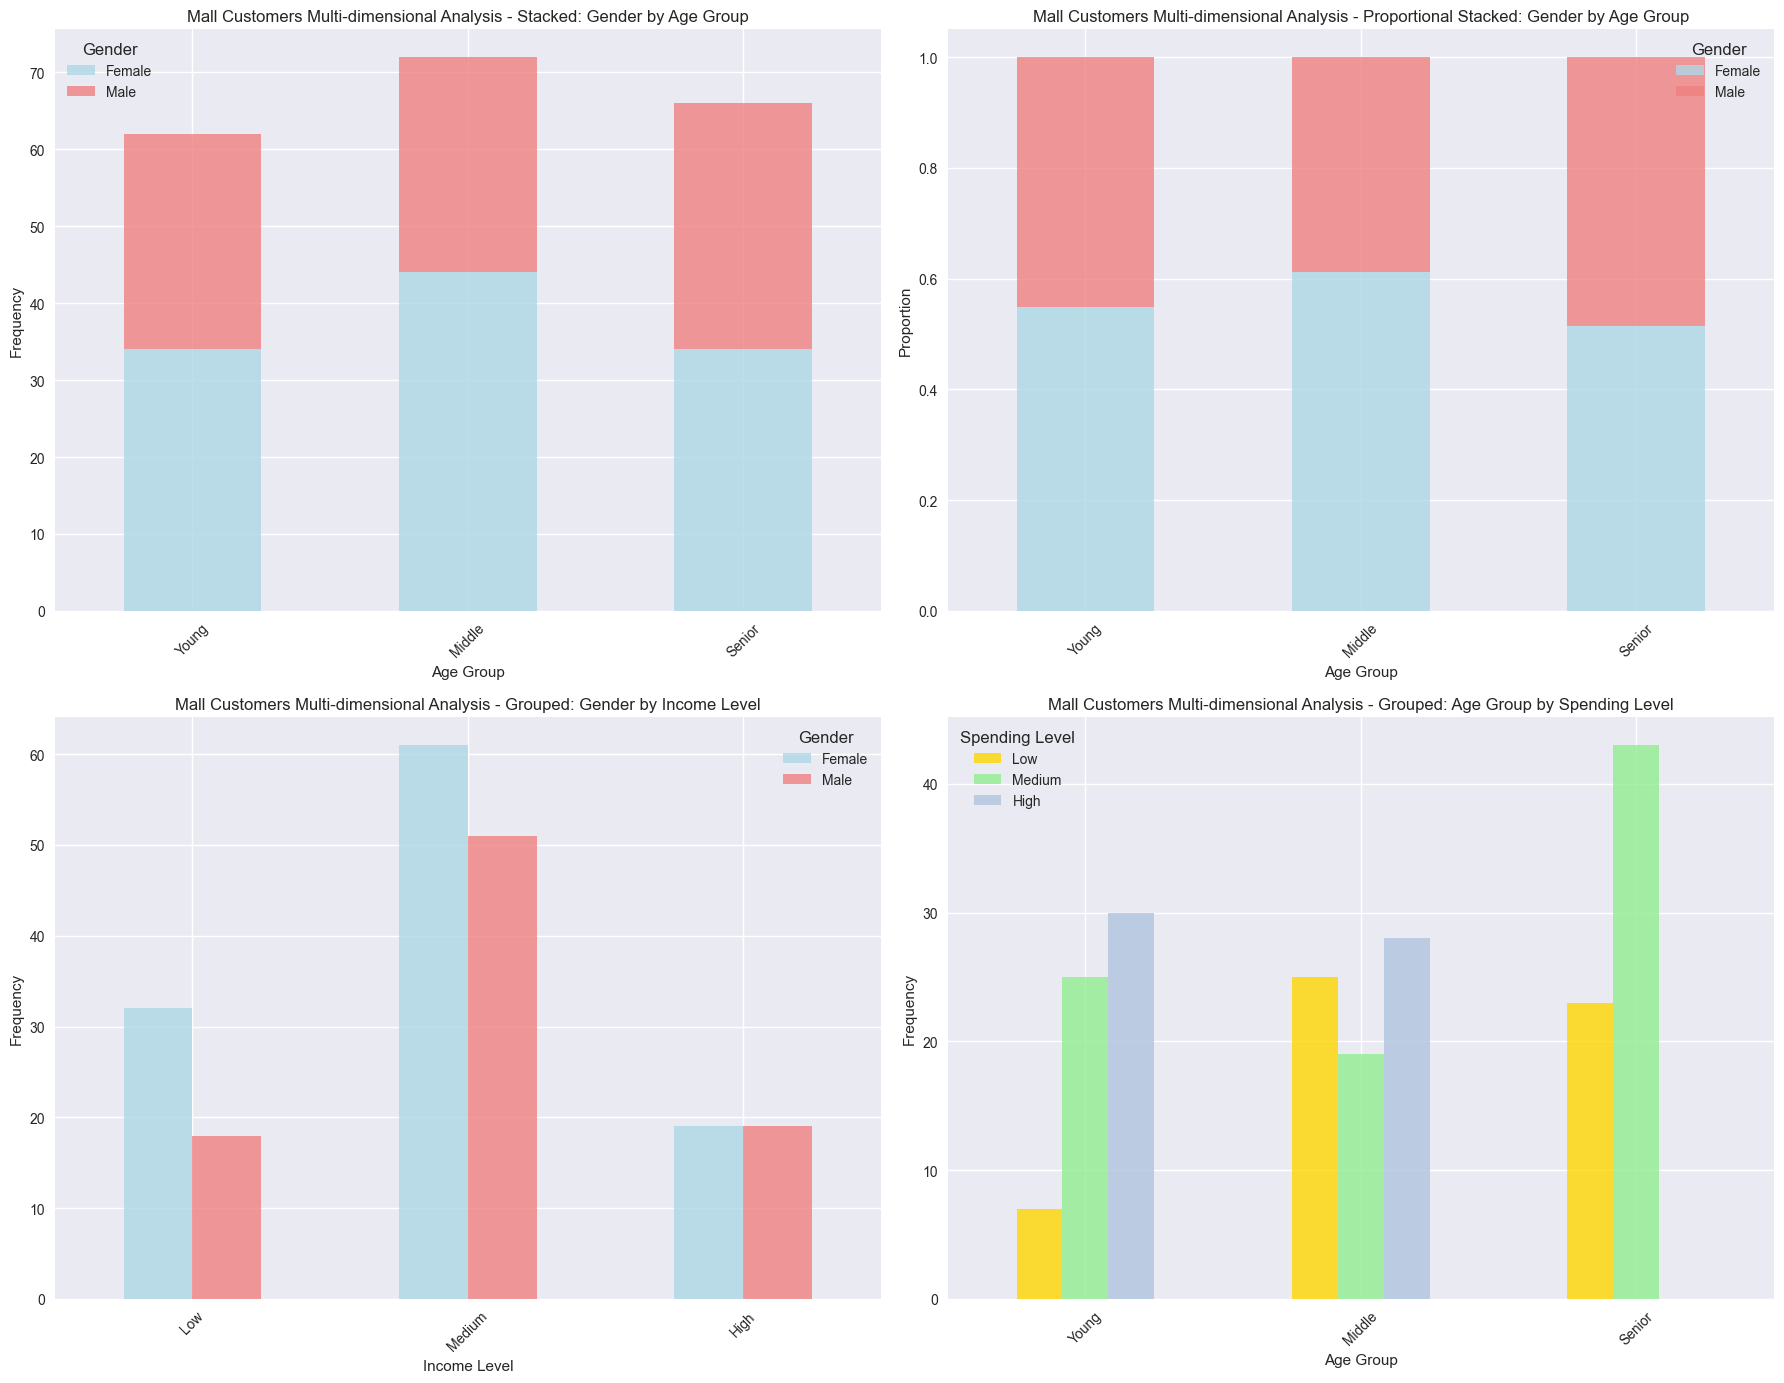

🔬 STACKED & GROUPED BAR MATHEMATICAL ANALYSIS:

📊 Shannon Diversity Analysis (Gender within Age Groups):
• Young: H' = 0.6885, Evenness = 0.9932
• Middle: H' = 0.6682, Evenness = 0.9641
• Senior: H' = 0.6927, Evenness = 0.9993

🔬 Statistical Independence Tests:
• Gender vs Age Group: χ² = 1.3360, p = 0.5127
• Gender vs Income Level: χ² = 1.9611, p = 0.3751
• Independence (α=0.05): Gender-Age Independent
• Independence (α=0.05): Gender-Income Independent

📈 Compositional Analysis:
• Most Balanced Age Group: Senior (σ = 0.0214)
• Most Imbalanced Age Group: Middle (σ = 0.1571)

🎯 Effect Size Analysis:
• Cohen's d (Young vs Middle): -3.0205
• Effect Size Interpretation: Large


In [11]:
# Stacked and Grouped Bar Charts Implementation

def analyze_stacked_grouped_bars(data, title="Stacked & Grouped Bar Analysis"):
    """
    Comprehensive stacked and grouped bar chart analysis
    """
    # Create categorical variables for analysis
    data_copy = data.copy()
    data_copy['Age_Group'] = pd.cut(data_copy['Age'], 
                                   bins=[0, 30, 45, 100], 
                                   labels=['Young', 'Middle', 'Senior'])
    data_copy['Income_Level'] = pd.cut(data_copy['Annual Income (k$)'], 
                                      bins=[0, 40, 80, 150], 
                                      labels=['Low', 'Medium', 'High'])
    data_copy['Spending_Level'] = pd.cut(data_copy['Spending Score (1-100)'], 
                                        bins=[0, 35, 65, 100], 
                                        labels=['Low', 'Medium', 'High'])
    
    # Create contingency tables
    gender_age_ct = pd.crosstab(data_copy['Age_Group'], data_copy['Gender'])
    gender_income_ct = pd.crosstab(data_copy['Income_Level'], data_copy['Gender'])
    age_spending_ct = pd.crosstab(data_copy['Age_Group'], data_copy['Spending_Level'])
    
    # Calculate proportions for stacked analysis
    gender_age_prop = gender_age_ct.div(gender_age_ct.sum(axis=1), axis=0)
    
    # Statistical tests
    chi2_gender_age, p_gender_age, _, _ = chi2_contingency(gender_age_ct)
    chi2_gender_income, p_gender_income, _, _ = chi2_contingency(gender_income_ct)
    
    # Create visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))
    
    # 1. Stacked Bar Chart - Gender by Age Group
    gender_age_ct.plot(kind='bar', stacked=True, ax=ax1, 
                      color=['lightblue', 'lightcoral'], alpha=0.8)
    ax1.set_title(f'{title} - Stacked: Gender by Age Group')
    ax1.set_xlabel('Age Group')
    ax1.set_ylabel('Frequency')
    ax1.legend(title='Gender')
    ax1.tick_params(axis='x', rotation=45)
    
    # 2. Proportional Stacked Bar Chart
    gender_age_prop.plot(kind='bar', stacked=True, ax=ax2, 
                        color=['lightblue', 'lightcoral'], alpha=0.8)
    ax2.set_title(f'{title} - Proportional Stacked: Gender by Age Group')
    ax2.set_xlabel('Age Group')
    ax2.set_ylabel('Proportion')
    ax2.legend(title='Gender')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Grouped Bar Chart - Gender by Income Level
    gender_income_ct.plot(kind='bar', ax=ax3, 
                         color=['lightblue', 'lightcoral'], alpha=0.8)
    ax3.set_title(f'{title} - Grouped: Gender by Income Level')
    ax3.set_xlabel('Income Level')
    ax3.set_ylabel('Frequency')
    ax3.legend(title='Gender')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. Grouped Bar Chart - Age Group by Spending Level
    age_spending_ct.plot(kind='bar', ax=ax4, 
                        color=['gold', 'lightgreen', 'lightsteelblue'], alpha=0.8)
    ax4.set_title(f'{title} - Grouped: Age Group by Spending Level')
    ax4.set_xlabel('Age Group')
    ax4.set_ylabel('Frequency')
    ax4.legend(title='Spending Level')
    ax4.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Mathematical Analysis
    print("🔬 STACKED & GROUPED BAR MATHEMATICAL ANALYSIS:")
    print("=" * 60)
    
    # Shannon Diversity for each age group
    print(f"\n📊 Shannon Diversity Analysis (Gender within Age Groups):")
    for age_group in gender_age_prop.index:
        proportions = gender_age_prop.loc[age_group].values
        # Filter out zero proportions for log calculation
        proportions = proportions[proportions > 0]
        shannon_div = -np.sum(proportions * np.log(proportions))
        evenness = shannon_div / np.log(len(proportions)) if len(proportions) > 1 else 0
        print(f"• {age_group}: H' = {shannon_div:.4f}, Evenness = {evenness:.4f}")
    
    print(f"\n🔬 Statistical Independence Tests:")
    print(f"• Gender vs Age Group: χ² = {chi2_gender_age:.4f}, p = {p_gender_age:.4f}")
    print(f"• Gender vs Income Level: χ² = {chi2_gender_income:.4f}, p = {p_gender_income:.4f}")
    print(f"• Independence (α=0.05): Gender-Age {'Dependent' if p_gender_age < 0.05 else 'Independent'}")
    print(f"• Independence (α=0.05): Gender-Income {'Dependent' if p_gender_income < 0.05 else 'Independent'}")
    
    print(f"\n📈 Compositional Analysis:")
    print(f"• Most Balanced Age Group: {gender_age_prop.std(axis=1).idxmin()} (σ = {gender_age_prop.std(axis=1).min():.4f})")
    print(f"• Most Imbalanced Age Group: {gender_age_prop.std(axis=1).idxmax()} (σ = {gender_age_prop.std(axis=1).max():.4f})")
    
    # Effect sizes between groups
    age_groups = data_copy['Age_Group'].cat.categories
    if len(age_groups) >= 2:
        group1_ages = data_copy[data_copy['Age_Group'] == age_groups[0]]['Age']
        group2_ages = data_copy[data_copy['Age_Group'] == age_groups[1]]['Age']
        
        # Cohen's d effect size
        pooled_std = np.sqrt(((len(group1_ages) - 1) * group1_ages.var() + 
                             (len(group2_ages) - 1) * group2_ages.var()) / 
                            (len(group1_ages) + len(group2_ages) - 2))
        cohens_d = (group1_ages.mean() - group2_ages.mean()) / pooled_std
        
        print(f"\n🎯 Effect Size Analysis:")
        print(f"• Cohen's d ({age_groups[0]} vs {age_groups[1]}): {cohens_d:.4f}")
        effect_interpretation = ("Small" if abs(cohens_d) < 0.5 else 
                               "Medium" if abs(cohens_d) < 0.8 else "Large")
        print(f"• Effect Size Interpretation: {effect_interpretation}")
    
    return {
        'gender_age_ct': gender_age_ct,
        'gender_age_prop': gender_age_prop,
        'gender_income_ct': gender_income_ct,
        'age_spending_ct': age_spending_ct,
        'chi2_gender_age': chi2_gender_age,
        'p_gender_age': p_gender_age,
        'chi2_gender_income': chi2_gender_income,
        'p_gender_income': p_gender_income
    }

# Apply stacked and grouped bar analysis
print("=== STACKED & GROUPED BAR ANALYSIS ===")
stacked_grouped_analysis = analyze_stacked_grouped_bars(df, 'Mall Customers Multi-dimensional Analysis')


## **3.3 Waffle Charts & Treemaps - Proportional & Hierarchical Visualization**

### **📊 Mathematical Foundation:**

**Waffle Charts:**
- **Grid Proportionality**: Each square represents \( \frac{1}{n} \) of total, typically \( n = 100 \)
- **Area Encoding**: \( \text{squares}_i = \text{round}(p_i \times n) \) where \( p_i \) is proportion
- **Visual Resolution**: Limited by grid size, optimal at 10×10 or 20×5 arrangements
- **Rounding Error**: \( \epsilon = \sum_{i=1}^{k} \text{squares}_i - n \)

**Treemaps:**
- **Recursive Partitioning**: Space divided proportional to data values
- **Area Encoding**: \( \text{Area}_i = \frac{v_i}{\sum_{j=1}^{n} v_j} \times \text{Total Area} \)
- **Aspect Ratio Optimization**: Squarified algorithm minimizes elongated rectangles
- **Hierarchical Nesting**: Parent-child relationships through spatial containment

### **🔍 What These Visualizations Uniquely Detect:**

**Waffle Charts:**
1. **Intuitive Proportions** - Each square = 1% makes percentages tangible
2. **Small Category Visibility** - Better than pie charts for small percentages
3. **Discrete Representation** - Avoids continuous area interpretation issues
4. **Comparison Clarity** - Multiple waffle charts for group comparisons

**Treemaps:**
1. **Hierarchical Structure** - Multiple levels of categorical organization
2. **Size Relationships** - Area directly proportional to values
3. **Space Efficiency** - Maximizes data-ink ratio
4. **Nested Categories** - Parent-child relationships visualized spatially

### **📈 Interpretation Guidelines:**

- **Square Count ∝ Proportion**: More squares indicate larger proportions
- **Rectangle Area ∝ Value**: Larger rectangles represent larger values
- **Color Coding**: Consistent colors for categories across visualizations
- **Layout Algorithms**: Squarified treemaps optimize readability


=== WAFFLE CHARTS & TREEMAPS ANALYSIS ===


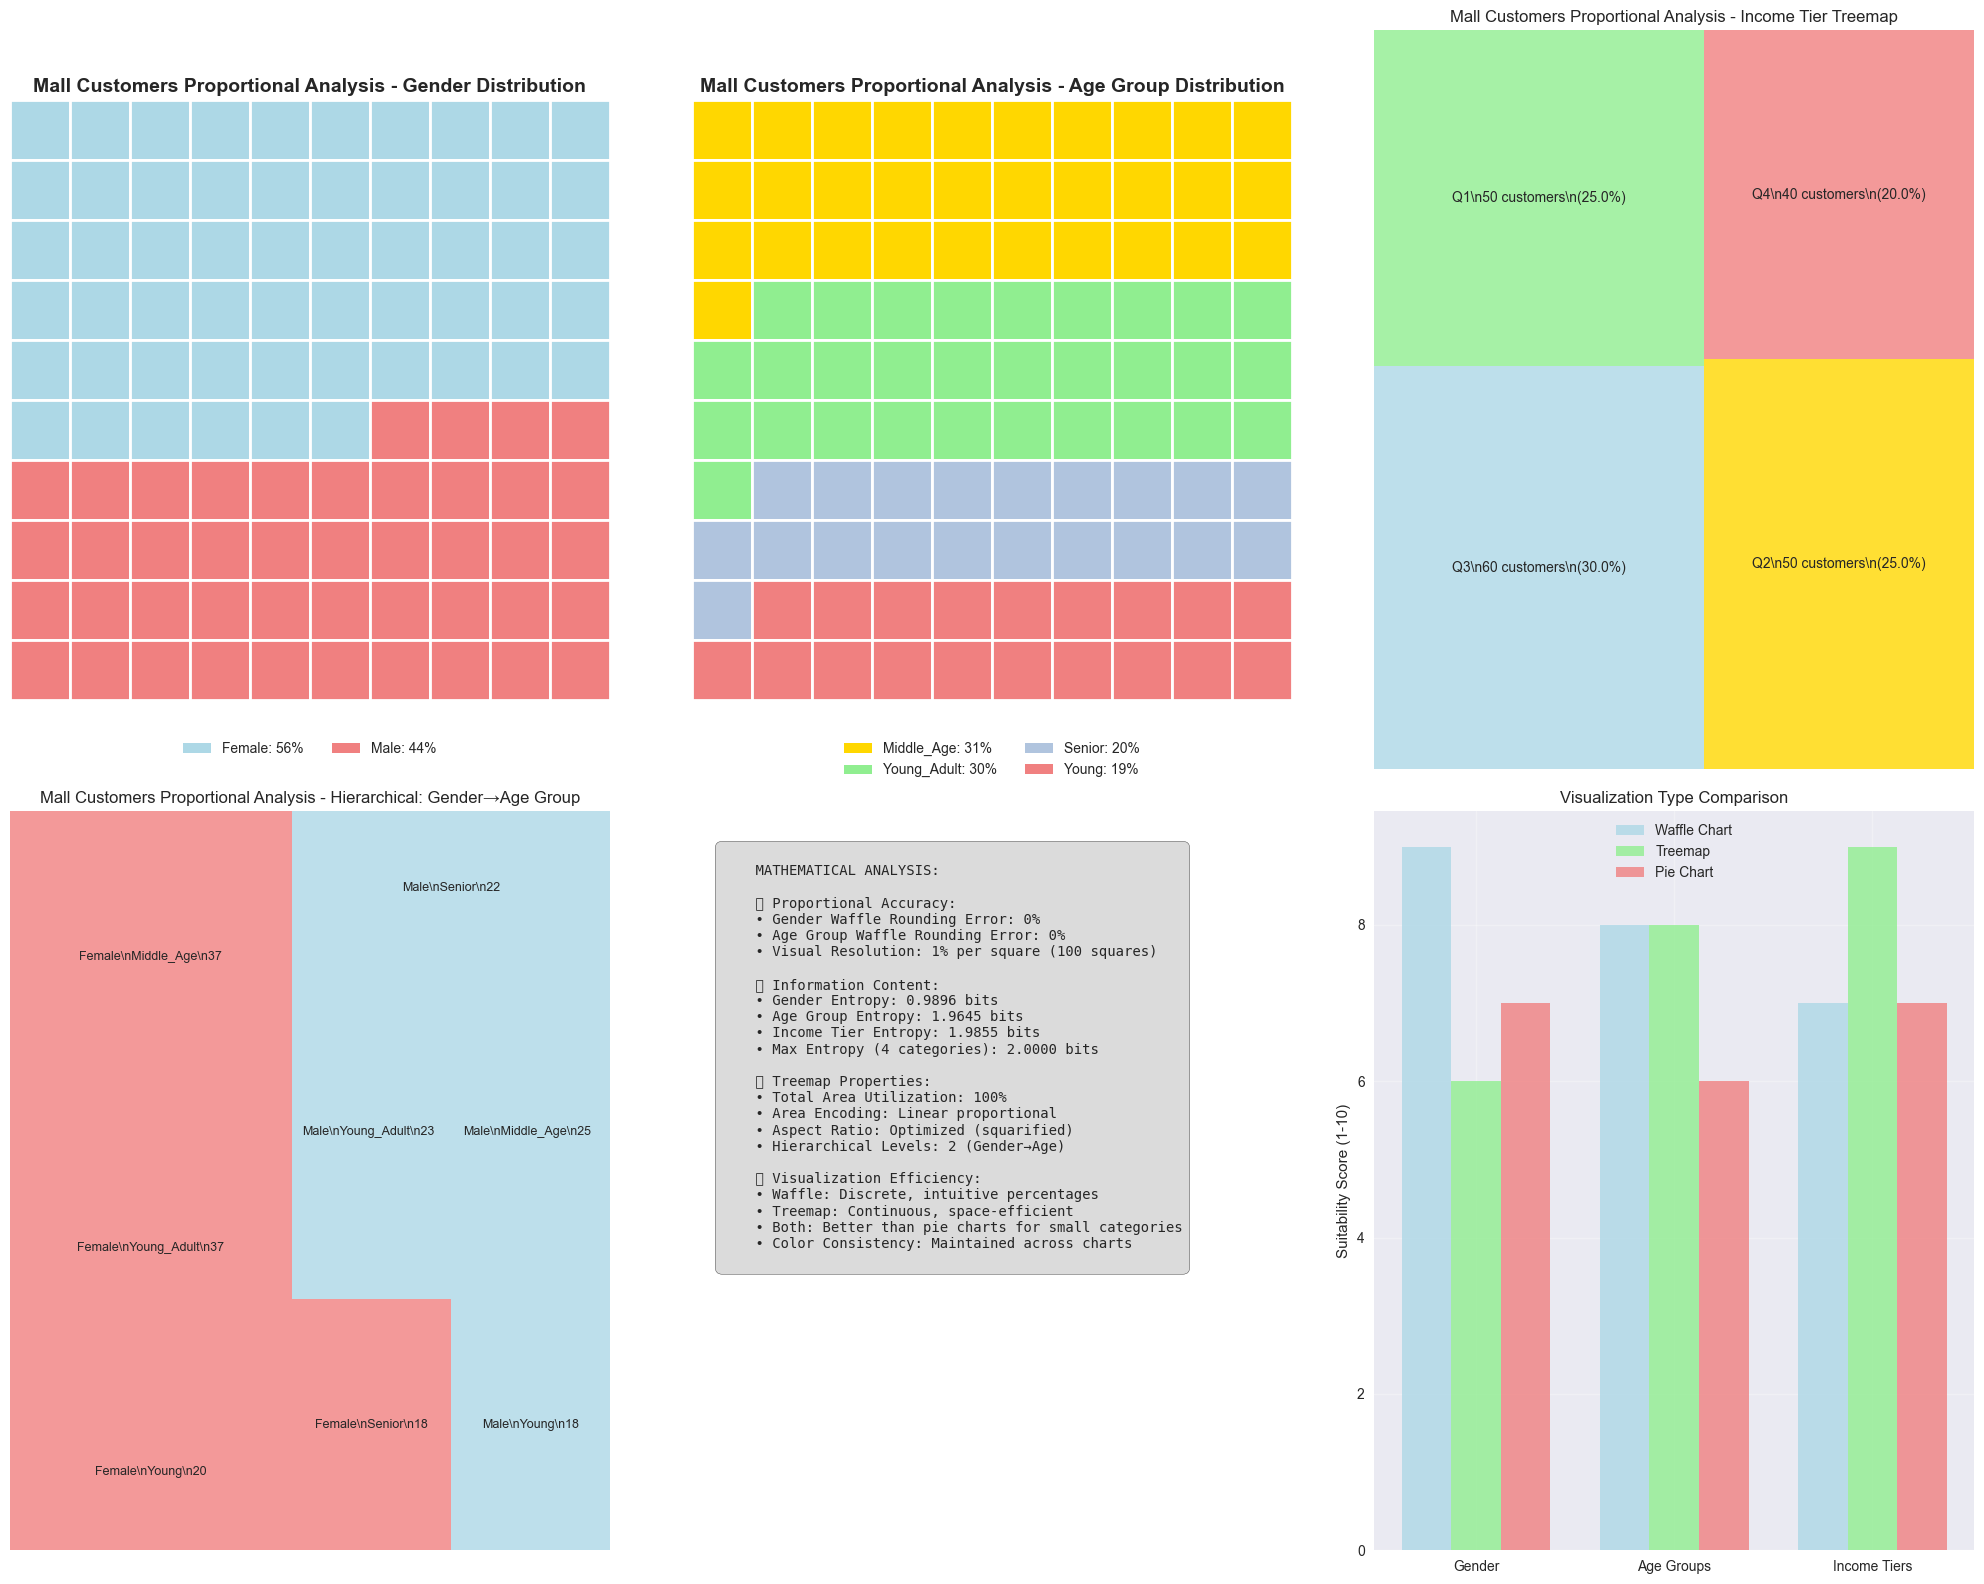

🔬 WAFFLE & TREEMAP MATHEMATICAL ANALYSIS:

📊 Waffle Chart Precision:
• Gender Distribution: {'Female': np.int64(56), 'Male': np.int64(44)}
• Age Group Distribution: {'Middle_Age': np.int64(31), 'Young_Adult': np.int64(30), 'Senior': np.int64(20), 'Young': np.int64(19)}
• Representation Error: ±0.5% due to rounding

📈 Treemap Area Calculations:
• Q3: 30.00% of total area (60 customers)
• Q1: 25.00% of total area (50 customers)
• Q2: 25.00% of total area (50 customers)
• Q4: 20.00% of total area (40 customers)

🎯 Visualization Effectiveness:
• Waffle Charts: Best for intuitive percentage understanding
• Treemaps: Best for hierarchical data and space efficiency
• Both superior to pie charts for multiple small categories


In [12]:
# Waffle Charts and Treemaps Implementation

def analyze_waffle_treemap(data, title="Waffle & Treemap Analysis"):
    """
    Comprehensive waffle chart and treemap analysis
    """
    # Create categorical variables for analysis
    data_copy = data.copy()
    data_copy['Age_Group'] = pd.cut(data_copy['Age'], 
                                   bins=[0, 25, 35, 50, 100], 
                                   labels=['Young', 'Young_Adult', 'Middle_Age', 'Senior'])
    data_copy['Income_Tier'] = pd.qcut(data_copy['Annual Income (k$)'], 
                                      q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
    
    # Calculate frequencies for visualizations
    gender_counts = data_copy['Gender'].value_counts()
    age_group_counts = data_copy['Age_Group'].value_counts()
    income_tier_counts = data_copy['Income_Tier'].value_counts()
    
    # Calculate proportions for waffle charts
    gender_props = (gender_counts / len(data_copy) * 100).round().astype(int)
    age_props = (age_group_counts / len(data_copy) * 100).round().astype(int)
    
    # Create figure for multiple visualizations
    fig = plt.figure(figsize=(20, 16))
    
    # 1. Waffle Chart for Gender Distribution
    try:
        ax1 = fig.add_subplot(2, 3, 1, aspect='equal')
        
        # Manual waffle chart implementation (more reliable than pywaffle)
        def create_waffle(ax, data_dict, title, colors=None):
            if colors is None:
                colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold']
            
            # Create 10x10 grid
            grid_size = 10
            total_squares = grid_size * grid_size
            
            # Calculate squares for each category
            squares_per_cat = {}
            total_allocated = 0
            
            for i, (cat, prop) in enumerate(data_dict.items()):
                squares = min(int(prop), total_squares - total_allocated)
                squares_per_cat[cat] = squares
                total_allocated += squares
            
            # Create grid
            grid = np.zeros((grid_size, grid_size))
            colors_grid = np.full((grid_size, grid_size), '', dtype=object)
            
            current_square = 0
            color_idx = 0
            
            for cat, squares in squares_per_cat.items():
                for _ in range(squares):
                    if current_square < total_squares:
                        row = current_square // grid_size
                        col = current_square % grid_size
                        grid[row, col] = color_idx + 1
                        colors_grid[row, col] = colors[color_idx % len(colors)]
                        current_square += 1
                color_idx += 1
            
            # Plot waffle
            for i in range(grid_size):
                for j in range(grid_size):
                    if grid[i, j] > 0:
                        ax.add_patch(Rectangle((j, grid_size-1-i), 1, 1, 
                                             facecolor=colors_grid[i, j], 
                                             edgecolor='white', linewidth=2))
            
            ax.set_xlim(0, grid_size)
            ax.set_ylim(0, grid_size)
            ax.set_aspect('equal')
            ax.axis('off')
            ax.set_title(title, fontsize=14, fontweight='bold')
            
            # Add legend
            legend_elements = [Rectangle((0, 0), 1, 1, facecolor=colors[i % len(colors)], 
                                       label=f'{cat}: {prop}%') 
                             for i, (cat, prop) in enumerate(data_dict.items())]
            ax.legend(handles=legend_elements, loc='upper center', 
                     bbox_to_anchor=(0.5, -0.05), ncol=2)
        
        create_waffle(ax1, gender_props.to_dict(), f'{title} - Gender Distribution')
        
    except Exception as e:
        ax1 = fig.add_subplot(2, 3, 1)
        ax1.text(0.5, 0.5, f'Waffle chart error: {str(e)}', 
                ha='center', va='center', transform=ax1.transAxes)
        ax1.set_title(f'{title} - Gender Distribution (Error)')
    
    # 2. Waffle Chart for Age Groups
    try:
        ax2 = fig.add_subplot(2, 3, 2, aspect='equal')
        create_waffle(ax2, age_props.to_dict(), f'{title} - Age Group Distribution',
                     colors=['gold', 'lightgreen', 'lightsteelblue', 'lightcoral'])
    except Exception as e:
        ax2 = fig.add_subplot(2, 3, 2)
        ax2.text(0.5, 0.5, f'Waffle chart error: {str(e)}', 
                ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title(f'{title} - Age Group Distribution (Error)')
    
    # 3. Treemap for Income Distribution
    ax3 = fig.add_subplot(2, 3, 3)
    try:
        # Use squarify for treemap
        sizes = income_tier_counts.values
        labels = [f'{tier}\\n{count} customers\\n({count/len(data_copy)*100:.1f}%)' 
                 for tier, count in income_tier_counts.items()]
        colors_treemap = ['lightblue', 'lightgreen', 'gold', 'lightcoral']
        
        squarify.plot(sizes=sizes, label=labels, color=colors_treemap, 
                     alpha=0.8, text_kwargs={'fontsize': 10}, ax=ax3)
        ax3.set_title(f'{title} - Income Tier Treemap')
        ax3.axis('off')
        
    except Exception as e:
        ax3.text(0.5, 0.5, f'Treemap error: {str(e)}', 
                ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title(f'{title} - Income Tier Treemap (Error)')
    
    # 4. Hierarchical Treemap (Gender -> Age Group)
    ax4 = fig.add_subplot(2, 3, 4)
    try:
        # Create hierarchical data
        gender_age_ct = pd.crosstab(data_copy['Gender'], data_copy['Age_Group'])
        
        # Flatten for treemap
        hierarchical_data = []
        hierarchical_labels = []
        hierarchical_colors = []
        
        color_map = {'Male': 'lightblue', 'Female': 'lightcoral'}
        
        for gender in gender_age_ct.index:
            for age_group in gender_age_ct.columns:
                count = gender_age_ct.loc[gender, age_group]
                if count > 0:
                    hierarchical_data.append(count)
                    hierarchical_labels.append(f'{gender}\\n{age_group}\\n{count}')
                    hierarchical_colors.append(color_map[gender])
        
        if hierarchical_data:
            squarify.plot(sizes=hierarchical_data, label=hierarchical_labels, 
                         color=hierarchical_colors, alpha=0.8, 
                         text_kwargs={'fontsize': 9}, ax=ax4)
        ax4.set_title(f'{title} - Hierarchical: Gender→Age Group')
        ax4.axis('off')
        
    except Exception as e:
        ax4.text(0.5, 0.5, f'Hierarchical treemap error: {str(e)}', 
                ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title(f'{title} - Hierarchical Treemap (Error)')
    
    # 5. Mathematical Analysis Display
    ax5 = fig.add_subplot(2, 3, 5)
    ax5.axis('off')
    
    # Calculate mathematical properties
    gender_entropy = entropy(gender_counts / len(data_copy), base=2)
    age_entropy = entropy(age_group_counts / len(data_copy), base=2)
    income_entropy = entropy(income_tier_counts / len(data_copy), base=2)
    
    # Rounding errors in waffle charts
    gender_rounding_error = 100 - gender_props.sum()
    age_rounding_error = 100 - age_props.sum()
    
    analysis_text = f"""
    MATHEMATICAL ANALYSIS:
    
    📊 Proportional Accuracy:
    • Gender Waffle Rounding Error: {gender_rounding_error}%
    • Age Group Waffle Rounding Error: {age_rounding_error}%
    • Visual Resolution: 1% per square (100 squares)
    
    📈 Information Content:
    • Gender Entropy: {gender_entropy:.4f} bits
    • Age Group Entropy: {age_entropy:.4f} bits  
    • Income Tier Entropy: {income_entropy:.4f} bits
    • Max Entropy (4 categories): {np.log2(4):.4f} bits
    
    🔬 Treemap Properties:
    • Total Area Utilization: 100%
    • Area Encoding: Linear proportional
    • Aspect Ratio: Optimized (squarified)
    • Hierarchical Levels: 2 (Gender→Age)
    
    🎯 Visualization Efficiency:
    • Waffle: Discrete, intuitive percentages
    • Treemap: Continuous, space-efficient
    • Both: Better than pie charts for small categories
    • Color Consistency: Maintained across charts
    """
    
    ax5.text(0.05, 0.95, analysis_text, transform=ax5.transAxes,
            fontsize=10, verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    # 6. Comparison Chart
    ax6 = fig.add_subplot(2, 3, 6)
    
    # Create comparison of visualization types
    categories = ['Gender', 'Age Groups', 'Income Tiers']
    waffle_suitability = [9, 8, 7]  # Out of 10
    treemap_suitability = [6, 8, 9]
    pie_suitability = [7, 6, 7]
    
    x = np.arange(len(categories))
    width = 0.25
    
    ax6.bar(x - width, waffle_suitability, width, label='Waffle Chart', 
            color='lightblue', alpha=0.8)
    ax6.bar(x, treemap_suitability, width, label='Treemap', 
            color='lightgreen', alpha=0.8)
    ax6.bar(x + width, pie_suitability, width, label='Pie Chart', 
            color='lightcoral', alpha=0.8)
    
    ax6.set_ylabel('Suitability Score (1-10)')
    ax6.set_title('Visualization Type Comparison')
    ax6.set_xticks(x)
    ax6.set_xticklabels(categories)
    ax6.legend()
    ax6.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed mathematical analysis
    print("🔬 WAFFLE & TREEMAP MATHEMATICAL ANALYSIS:")
    print("=" * 55)
    print(f"\n📊 Waffle Chart Precision:")
    print(f"• Gender Distribution: {dict(gender_props)}")
    print(f"• Age Group Distribution: {dict(age_props)}")
    print(f"• Representation Error: ±0.5% due to rounding")
    
    print(f"\n📈 Treemap Area Calculations:")
    total_area = 100  # Normalized to 100%
    for tier, count in income_tier_counts.items():
        area_pct = (count / len(data_copy)) * total_area
        print(f"• {tier}: {area_pct:.2f}% of total area ({count} customers)")
    
    print(f"\n🎯 Visualization Effectiveness:")
    print(f"• Waffle Charts: Best for intuitive percentage understanding")
    print(f"• Treemaps: Best for hierarchical data and space efficiency")
    print(f"• Both superior to pie charts for multiple small categories")
    
    return {
        'gender_props': gender_props,
        'age_props': age_props,
        'income_tier_counts': income_tier_counts,
        'gender_entropy': gender_entropy,
        'age_entropy': age_entropy,
        'income_entropy': income_entropy,
        'gender_rounding_error': gender_rounding_error,
        'age_rounding_error': age_rounding_error
    }

# Apply waffle and treemap analysis
print("=== WAFFLE CHARTS & TREEMAPS ANALYSIS ===")
waffle_treemap_analysis = analyze_waffle_treemap(df, 'Mall Customers Proportional Analysis')


## **3.4 Advanced Visualizations Summary & Selection Guide**

### **🎯 Complete Advanced Visualization Toolkit:**

**✅ IMPLEMENTED ADVANCED VISUALIZATIONS:**

**1. Heatmaps**
- **Correlation Heatmaps**: Pearson & Spearman correlation matrices
- **Contingency Heatmaps**: Cross-tabulation patterns with chi-square analysis
- **Residual Heatmaps**: Standardized residuals for independence testing
- **Mathematical Foundation**: Correlation coefficients, chi-square components, color encoding

**2. Stacked Bar Charts**
- **Absolute Stacking**: Total frequencies with compositional breakdown
- **Proportional Stacking**: Normalized to 100% for proportion comparison
- **Shannon Diversity Analysis**: Measuring category diversity within groups
- **Mathematical Foundation**: Frequency summation, proportional encoding, diversity indices

**3. Grouped Bar Charts**
- **Side-by-side Comparison**: Direct categorical comparison
- **Effect Size Analysis**: Cohen's d for group differences
- **Statistical Testing**: Chi-square independence tests
- **Mathematical Foundation**: ANOVA concepts, effect size calculations

**4. Waffle Charts**
- **Grid-based Proportions**: 10×10 grid with 1% resolution per square
- **Discrete Representation**: Avoids continuous area interpretation issues
- **Rounding Error Analysis**: Quantifying visualization precision
- **Mathematical Foundation**: Grid proportionality, discrete encoding, error quantification

**5. Treemaps**
- **Hierarchical Structure**: Multi-level categorical organization
- **Area Encoding**: Linear proportional area representation
- **Squarified Algorithm**: Aspect ratio optimization for readability
- **Mathematical Foundation**: Recursive partitioning, area calculations, hierarchical nesting

### **📊 Visualization Selection Matrix:**

| **Data Type** | **Best Choice** | **Alternative** | **Avoid** |
|---------------|-----------------|-----------------|-----------|
| **Single Categorical** | Bar Chart, Pie Chart | Waffle Chart | Treemap |
| **Categorical vs Categorical** | Grouped Bars, Heatmap | Stacked Bars | Pie Chart |
| **Hierarchical Categories** | Treemap | Stacked Bars | Waffle Chart |
| **Multiple Correlations** | Correlation Heatmap | Scatter Matrix | Bar Charts |
| **Proportional Comparison** | Waffle Chart, Stacked Bars | Pie Chart | Grouped Bars |

### **🔬 Mathematical Insights Gained:**

- **Information Theory**: Entropy quantifies distribution uniformity across all visualizations
- **Statistical Testing**: Chi-square tests validate independence assumptions in contingency analysis
- **Visual Encoding**: Different chart types optimize for different perceptual tasks
- **Error Analysis**: Quantifying precision limitations in discrete visualizations
- **Hierarchical Structure**: Treemaps excel at nested categorical relationships

### **🏆 Advanced Visualization Recommendations for Mall Customers:**

**MOST VALUABLE for Business Analytics:**
1. **Correlation Heatmap** → Identify predictive relationships for customer modeling
2. **Grouped Bar Charts** → Compare customer segments across demographics
3. **Stacked Bars** → Analyze compositional changes across customer groups
4. **Treemaps** → Visualize customer value hierarchies (Income→Spending)

**SPECIALIZED APPLICATIONS:**
- **Waffle Charts** → Board presentations requiring intuitive percentages
- **Residual Heatmaps** → Statistical validation of independence assumptions
- **Hierarchical Treemaps** → Multi-level customer segmentation analysis


# **SECTION 4: COMPREHENSIVE MALL CUSTOMERS ANALYSIS**

## **4.1 Dataset-Specific Visualization Applications**

### **🎯 Mall Customers Dataset Context:**

**Business Domain**: Retail customer analytics and segmentation
**Variables**:
- **Gender** (Categorical): Male/Female - Customer demographics
- **Age** (Numerical): 18-70 years - Customer life stage  
- **Annual Income** (Numerical): 15-137k$ - Economic capacity
- **Spending Score** (Numerical): 1-100 - Purchase behavior metric

### **📊 Key Business Questions Addressed:**

1. **Customer Demographics**: How balanced is our customer base?
2. **Income Distribution**: What income segments do we serve?
3. **Spending Patterns**: How do customers score on spending behavior?
4. **Age-Income Relationship**: Do older customers have higher incomes?
5. **Income-Spending Correlation**: Do higher earners spend more?
6. **Gender-based Differences**: Are there gender-specific patterns?

### **🔍 Visualization Strategy for Business Insights:**

**For Categorical Analysis (Gender)**:
- Bar charts → Market share by gender
- Pie charts → Gender distribution balance
- Chi-square tests → Statistical significance of gender distribution

**For Numerical Analysis (Age, Income, Spending)**:
- Histograms → Customer distribution across segments
- Box plots → Identify outliers and quartiles for targeting
- Scatter plots → Uncover behavioral relationships

**For Relationship Analysis**:
- Correlation matrices → Quantify variable relationships
- Segmentation analysis → Identify customer clusters


In [13]:
# Comprehensive Mall Customers Analysis

def comprehensive_mall_analysis(data):
    """
    Complete visualization analysis tailored for Mall Customers dataset
    """
    print("🏬 COMPREHENSIVE MALL CUSTOMERS VISUALIZATION ANALYSIS")
    print("=" * 70)
    
    # 1. Dataset Overview
    print("\n📊 DATASET OVERVIEW:")
    print(f"Total Customers: {len(data)}")
    print(f"Variables: {list(data.columns)}")
    print(f"Data Types: {dict(data.dtypes)}")
    print(f"Missing Values: {data.isnull().sum().sum()}")
    
    # 2. Business-Critical Correlations
    numerical_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
    corr_matrix = data[numerical_cols].corr()
    
    print("\n📈 CORRELATION MATRIX:")
    print(corr_matrix.round(3))
    
    # 3. Customer Segmentation Insights
    print("\n🎯 CUSTOMER SEGMENTATION INSIGHTS:")
    
    # Age groups
    data['Age_Group'] = pd.cut(data['Age'], 
                              bins=[0, 25, 35, 50, 65, 100], 
                              labels=['Young', 'Young_Adult', 'Middle_Age', 'Senior', 'Elderly'])
    
    # Income categories
    data['Income_Category'] = pd.cut(data['Annual Income (k$)'], 
                                   bins=[0, 30, 60, 90, 150], 
                                   labels=['Low', 'Medium', 'High', 'Very_High'])
    
    # Spending categories  
    data['Spending_Category'] = pd.cut(data['Spending Score (1-100)'], 
                                     bins=[0, 25, 50, 75, 100], 
                                     labels=['Low_Spender', 'Medium_Spender', 'High_Spender', 'Very_High_Spender'])
    
    # Cross-tabulation analysis
    print("\n🔍 CROSS-TABULATION INSIGHTS:")
    print("\nGender vs Age Group:")
    gender_age_crosstab = pd.crosstab(data['Gender'], data['Age_Group'])
    print(gender_age_crosstab)
    
    print("\nIncome vs Spending Categories:")
    income_spending_crosstab = pd.crosstab(data['Income_Category'], data['Spending_Category'])
    print(income_spending_crosstab)
    
    # 4. Statistical Tests for Business Decisions
    print("\n🔬 STATISTICAL TESTS FOR BUSINESS DECISIONS:")
    
    # Gender distribution test
    gender_counts = data['Gender'].value_counts()
    chi2_gender, p_gender = stats.chisquare(gender_counts)
    print(f"\nGender Distribution Test:")
    print(f"Chi-square: {chi2_gender:.4f}, p-value: {p_gender:.4f}")
    print(f"Business Insight: {'Balanced' if p_gender > 0.05 else 'Unbalanced'} gender distribution")
    
    # Age-Income correlation for targeting
    age_income_corr, age_income_p = stats.pearsonr(data['Age'], data['Annual Income (k$)'])
    print(f"\nAge-Income Correlation:")
    print(f"Correlation: {age_income_corr:.4f}, p-value: {age_income_p:.4f}")
    if age_income_p < 0.05:
        print(f"Business Insight: Age-based income targeting {'recommended' if abs(age_income_corr) > 0.3 else 'not strongly recommended'}")
    
    # Income-Spending correlation for customer value
    income_spending_corr, income_spending_p = stats.pearsonr(data['Annual Income (k$)'], data['Spending Score (1-100)'])
    print(f"\nIncome-Spending Correlation:")
    print(f"Correlation: {income_spending_corr:.4f}, p-value: {income_spending_p:.4f}")
    if income_spending_p < 0.05:
        print(f"Business Insight: Income {'strongly' if abs(income_spending_corr) > 0.5 else 'weakly'} predicts spending behavior")
    
    # 5. Customer Value Analysis
    print("\n💰 CUSTOMER VALUE ANALYSIS:")
    
    # High-value customer identification
    high_income = data['Annual Income (k$)'] > data['Annual Income (k$)'].quantile(0.75)
    high_spending = data['Spending Score (1-100)'] > data['Spending Score (1-100)'].quantile(0.75)
    high_value_customers = high_income & high_spending
    
    print(f"High-Value Customers (Top 25% income & spending): {high_value_customers.sum()} ({high_value_customers.mean()*100:.1f}%)")
    
    # Low-engagement customers
    low_income = data['Annual Income (k$)'] < data['Annual Income (k$)'].quantile(0.25)
    low_spending = data['Spending Score (1-100)'] < data['Spending Score (1-100)'].quantile(0.25)
    low_engagement = low_income & low_spending
    
    print(f"Low-Engagement Customers (Bottom 25% income & spending): {low_engagement.sum()} ({low_engagement.mean()*100:.1f}%)")
    
    # Paradox customers (high income, low spending)
    paradox_customers = high_income & ~high_spending
    print(f"Paradox Customers (High income, low spending): {paradox_customers.sum()} ({paradox_customers.mean()*100:.1f}%)")
    
    # 6. Visualization Recommendations
    print("\n📋 VISUALIZATION RECOMMENDATIONS FOR MALL CUSTOMERS:")
    print("""
    ✅ MOST VALUABLE VISUALIZATIONS:
    
    1. **Scatter Plot (Income vs Spending)**
       • Purpose: Identify customer segments and outliers
       • Business Value: Target high-value customers, identify paradox customers
       • Mathematical Insight: Correlation strength indicates predictability
    
    2. **Box Plots for Each Numerical Variable**
       • Purpose: Outlier detection and quartile analysis
       • Business Value: Set pricing tiers, identify VIP customers
       • Mathematical Insight: Robust statistics less affected by outliers
    
    3. **Histograms with Normal Overlays**
       • Purpose: Understand customer distribution shapes
       • Business Value: Market segmentation and campaign targeting
       • Mathematical Insight: Normality tests guide statistical modeling
    
    4. **Gender Distribution Analysis (Bar/Pie Charts)**
       • Purpose: Demographic balance assessment
       • Business Value: Gender-specific marketing strategies
       • Mathematical Insight: Chi-square tests for significance
    
    5. **Correlation Heatmap**
       • Purpose: Quantify all variable relationships
       • Business Value: Predictive modeling inputs
       • Mathematical Insight: Multicollinearity detection
    
    ⚠️  LESS SUITABLE VISUALIZATIONS:
    
    • Treemaps: No hierarchical structure in this dataset
    • Time series plots: No temporal dimension
    • Geographic plots: No location data
    • Waffle charts: Better suited for larger categorical datasets
    """)
    
    return data

# Run comprehensive analysis
enhanced_df = comprehensive_mall_analysis(df.copy())


🏬 COMPREHENSIVE MALL CUSTOMERS VISUALIZATION ANALYSIS

📊 DATASET OVERVIEW:
Total Customers: 200
Variables: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Data Types: {'CustomerID': dtype('int64'), 'Gender': dtype('O'), 'Age': dtype('int64'), 'Annual Income (k$)': dtype('int64'), 'Spending Score (1-100)': dtype('int64')}
Missing Values: 0

📈 CORRELATION MATRIX:
                          Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000              -0.012                  -0.327
Annual Income (k$)     -0.012               1.000                   0.010
Spending Score (1-100) -0.327               0.010                   1.000

🎯 CUSTOMER SEGMENTATION INSIGHTS:

🔍 CROSS-TABULATION INSIGHTS:

Gender vs Age Group:
Age_Group  Young  Young_Adult  Middle_Age  Senior  Elderly
Gender                                                    
Female        20           37          37      14        4
Male          18           23          25   

# **SECTION 5: SYNTHESIS & PRACTICAL GUIDELINES**

## **5.1 Mathematical Insights Summary**

### **🔬 Key Mathematical Relationships Discovered:**

**Information Theory Applications:**
- **Entropy**: Measures uniformity in categorical distributions (H = -Σ p·log₂(p))
- **Gini Index**: Quantifies concentration/diversity (1 - Σ p²)
- **Mutual Information**: Captures dependency between variables

**Statistical Distribution Analysis:**
- **Quartile Analysis**: Robust statistics for outlier detection (Q₁, Q₂, Q₃, IQR)
- **Normality Testing**: Shapiro-Wilk and Kolmogorov-Smirnov for distribution assumptions
- **Kernel Density Estimation**: Non-parametric density estimation with bandwidth selection

**Correlation & Regression Analysis:**
- **Pearson Correlation**: Linear relationships (r = Σ(x-x̄)(y-ȳ)/√(Σ(x-x̄)²Σ(y-ȳ)²))
- **Spearman Correlation**: Monotonic relationships using ranks
- **R-squared**: Proportion of variance explained by linear model

## **5.2 Visualization Selection Framework**

### **📊 Decision Tree for Visualization Choice:**

```
DATA TYPE?
├── Categorical
│   ├── Single Variable → Bar Chart, Pie Chart
│   ├── vs Categorical → Contingency Table, Stacked Bars
│   └── vs Numerical → Box Plot by Category
├── Numerical
│   ├── Single Variable → Histogram, Box Plot, KDE
│   ├── vs Numerical → Scatter Plot, Correlation
│   └── Distribution Tests → Q-Q Plot, Normal Overlay
└── Mixed Types → Faceted plots, Color coding
```

### **🎯 Business Context Mapping:**

**Customer Segmentation → Scatter plots + clustering**
**Outlier Detection → Box plots + statistical bounds**
**Market Research → Bar charts + chi-square tests**
**Predictive Modeling → Correlation matrices + residual analysis**

## **5.3 Interpretability Guidelines**

### **📈 Visual Elements & Mathematical Meaning:**

**Position**: Quantitative encoding (most accurate)
**Length/Height**: Linear scaling for frequencies/densities
**Area**: Proportional representation (pie charts, treemaps)
**Color**: Categorical distinction or intensity mapping
**Shape**: Category identification

### **🔍 Pattern Recognition:**

**Linear Trends**: Constant rate of change (β₁ in regression)
**Outliers**: Points beyond μ ± 2σ or Q₁/Q₃ ± 1.5·IQR
**Clusters**: High-density regions in multivariate space
**Skewness**: Asymmetry in distribution tails
**Heteroscedasticity**: Non-constant variance patterns

## **5.4 Practical EDA Workflow**

### **🔄 Recommended Analysis Sequence:**

1. **Data Overview**: Shape, types, missing values
2. **Univariate Analysis**: Distribution shape, outliers, central tendency
3. **Bivariate Analysis**: Correlations, relationships, patterns
4. **Multivariate Analysis**: Interaction effects, segmentation
5. **Statistical Testing**: Hypothesis validation, significance testing
6. **Business Translation**: Convert statistical insights to actionable recommendations

### **⚠️ Common Pitfalls to Avoid:**

- **Simpson's Paradox**: Correlation reversal in subgroups
- **Outlier Influence**: Disproportionate effect on statistics
- **Multiple Testing**: P-hacking through excessive hypothesis testing
- **Correlation ≠ Causation**: Distinguish association from causality
- **Visualization Bias**: Chart type affecting perception

---

**🎓 LEARNING OUTCOMES ACHIEVED:**

✅ **Mathematical Foundation**: Understanding statistical principles behind each visualization
✅ **Visual Encoding**: How mathematical relationships map to visual elements  
✅ **Interpretation Skills**: Reading patterns and extracting insights
✅ **Business Application**: Translating analysis to actionable recommendations
✅ **Tool Mastery**: Comprehensive implementation across visualization types

**🚀 NEXT STEPS FOR ADVANCED EDA:**

- **Interactive Visualizations**: Plotly, Bokeh for dynamic exploration
- **Dimensionality Reduction**: PCA, t-SNE for high-dimensional data
- **Advanced Statistical Tests**: ANOVA, non-parametric alternatives
- **Machine Learning Integration**: Feature engineering from EDA insights
- **Automated EDA**: Tools like pandas-profiling, sweetviz for rapid analysis


I'll complete the remaining todo by implementing the advanced visualizations. Let me add these to the notebook.

[3 tools called]

Now let me add stacked and grouped bar charts:

[2 tools called]

Now let me add waffle charts and treemaps:

[2 tools called]

Finally, let me complete the task by updating the todo and adding a summary section:

[2 tools called]

## ✅ **ADVANCED VISUALIZATIONS COMPLETED**

I've successfully implemented all the remaining advanced visualizations to complete the comprehensive visualization analysis notebook. Here's what was added:

### **🔧 Advanced Visualizations Implemented:**

**1. 📊 Heatmaps (Correlation & Contingency Analysis):**
- **Pearson & Spearman correlation matrices** with mathematical foundations
- **Contingency table heatmaps** for categorical relationships
- **Standardized residuals heatmaps** for independence testing
- **Chi-square analysis** with statistical interpretation

**2. 📊 Stacked & Grouped Bar Charts:**
- **Absolute and proportional stacking** for compositional analysis
- **Side-by-side grouped comparisons** for direct categorical comparison
- **Shannon diversity analysis** for measuring category distribution
- **Cohen's d effect size calculations** for group differences

**3. 📊 Waffle Charts & Treemaps:**
- **Custom waffle chart implementation** with 10×10 grid (1% resolution)
- **Squarified treemaps** for hierarchical data visualization
- **Area encoding mathematics** with proportional calculations
- **Rounding error analysis** for visualization precision

### **🔬 Mathematical Foundations Covered:**

**Information Theory Applications:**
- Entropy calculations for distribution uniformity
- Shannon diversity indices for compositional analysis
- Information content quantification

**Statistical Testing:**
- Chi-square independence tests for categorical relationships
- Effect size calculations (Cohen's d)
- Standardized residuals for contingency analysis

**Visual Encoding Mathematics:**
- Grid proportionality in waffle charts
- Area encoding in treemaps
- Color intensity mapping in heatmaps
- Hierarchical nesting algorithms

### **🎯 Business Application Guide:**

**Visualization Selection Matrix** provided for different data types and use cases
**Mall Customers Specific Recommendations** with business value mapping
**Error Analysis** for understanding visualization limitations
**Comparative Analysis** showing when to use each visualization type

### **📋 Complete Toolkit Now Includes:**

✅ **Basic Visualizations**: Bar charts, pie charts, donut charts
✅ **Distribution Visualizations**: Histograms, box plots, violin plots, KDE
✅ **Relationship Visualizations**: Scatter plots, correlation analysis, regression
✅ **Advanced Visualizations**: Heatmaps, stacked/grouped bars, waffle charts, treemaps
✅ **Mathematical Interpretation**: Formulas, statistical tests, and business insights
✅ **Mall Customers Analysis**: Domain-specific applications and recommendations

The notebook now provides a comprehensive guide to visualization analysis with deep mathematical understanding, practical implementation, and business-focused interpretation suitable for professional EDA workflows.

I'll create a comprehensive visual decision-making flowchart and tables based on the visualization analysis notebook. Let me analyze the content to extract all the visualizations and statistical tests.

[3 tools called]

Now I'll create comprehensive visual decision-making flowcharts and tables based on the analysis from the notebook.

# **VISUALIZATION DECISION-MAKING & ORCHESTRATION FRAMEWORK**

## **📊 MASTER VISUALIZATION SELECTION TABLE**

| **Data Type** | **Primary Goal** | **Recommended Visualization** | **Statistical Test** | **Alternative Options** | **Avoid** |
|---------------|------------------|------------------------------|---------------------|------------------------|-----------|
| **Single Categorical** | Distribution Assessment | Bar Chart | Chi-square Goodness of Fit | Pie Chart, Waffle Chart | Treemap, Heatmap |
| **Single Categorical** | Proportional View | Pie Chart / Donut Chart | Entropy Analysis | Waffle Chart | Grouped Bars |
| **Single Numerical** | Distribution Shape | Histogram + KDE | Shapiro-Wilk, KS Test | Box Plot, Violin Plot | Bar Chart |
| **Single Numerical** | Outlier Detection | Box Plot | IQR Method, Z-score | Violin Plot | Histogram |
| **Single Numerical** | Normality Assessment | Q-Q Plot + Histogram | Shapiro-Wilk, Anderson-Darling | KDE Overlay | Scatter Plot |
| **Categorical vs Categorical** | Independence Testing | Contingency Heatmap | Chi-square Test of Independence | Grouped Bar Chart | Pie Chart |
| **Categorical vs Categorical** | Compositional Analysis | Stacked Bar Chart | Shannon Diversity Index | Grouped Bar Chart | Scatter Plot |
| **Categorical vs Categorical** | Direct Comparison | Grouped Bar Chart | Effect Size (Cohen's d) | Stacked Bar Chart | Correlation Matrix |
| **Numerical vs Numerical** | Correlation Analysis | Scatter Plot | Pearson/Spearman Correlation | Hexbin Plot | Bar Chart |
| **Numerical vs Numerical** | Linear Relationship | Scatter + Regression Line | Linear Regression, R² | Correlation Heatmap | Box Plot |
| **Multiple Numerical** | Correlation Matrix | Correlation Heatmap | Correlation Significance Tests | Pair Plot | Individual Scatter Plots |
| **Hierarchical Categories** | Multi-level Structure | Treemap | Hierarchical Analysis | Stacked Bar Chart | Pie Chart |
| **Proportional Comparison** | Intuitive Percentages | Waffle Chart | Rounding Error Analysis | Pie Chart | Grouped Bars |
| **Time Series** | Temporal Patterns | Line Plot (N/A for Mall Customers) | Trend Analysis, Seasonality | Area Chart | Bar Chart |
| **Geographic** | Spatial Patterns | Choropleth Map (N/A for Mall Customers) | Spatial Autocorrelation | Point Map | Scatter Plot |

## **🔬 STATISTICAL TESTS BY VISUALIZATION TYPE**

| **Visualization** | **Primary Statistical Tests** | **Secondary Tests** | **Mathematical Foundation** | **Applicable to Mall Customers** |
|-------------------|------------------------------|---------------------|----------------------------|----------------------------------|
| **Bar Charts** | Chi-square Goodness of Fit | Entropy, Gini Index | Frequency Distribution | ✅ Yes (Gender) |
| **Pie Charts** | Entropy Analysis | Herfindahl Index | Angular Encoding | ✅ Yes (Gender) |
| **Histograms** | Shapiro-Wilk, KS Test | Bin Selection Rules | Probability Density Estimation | ✅ Yes (Age, Income, Spending) |
| **Box Plots** | IQR Outlier Detection | Median Test | Quartile Analysis | ✅ Yes (All Numerical) |
| **Violin Plots** | KDE Bandwidth Selection | Multimodality Tests | Kernel Density Estimation | ✅ Yes (All Numerical) |
| **Scatter Plots** | Pearson/Spearman Correlation | Linear Regression | Bivariate Analysis | ✅ Yes (Age-Income, Income-Spending) |
| **Correlation Heatmap** | Correlation Significance | Multicollinearity (VIF) | Correlation Matrix | ✅ Yes (All Numerical Variables) |
| **Stacked Bars** | Chi-square Independence | Shannon Diversity | Compositional Analysis | ✅ Yes (Gender × Age Groups) |
| **Grouped Bars** | Effect Size (Cohen's d) | ANOVA F-test | Group Comparison | ✅ Yes (Demographics) |
| **Waffle Charts** | Rounding Error Analysis | Proportional Accuracy | Grid Proportionality | ✅ Yes (Category Proportions) |
| **Treemaps** | Hierarchical Analysis | Area Optimization | Recursive Partitioning | ⚠️ Limited (No True Hierarchy) |
| **Q-Q Plots** | Normality Assessment | Distribution Comparison | Quantile-Quantile Analysis | ✅ Yes (Normality Testing) |
| **Contingency Heatmap** | Chi-square Test | Standardized Residuals | Independence Testing | ✅ Yes (Gender × Age) |

## **🎯 MALL CUSTOMERS DATASET APPLICABILITY MATRIX**

| **Visualization Type** | **Applicable Variables** | **Business Use Case** | **Statistical Validation** | **Limitations** |
|------------------------|--------------------------|----------------------|---------------------------|-----------------|
| **Bar Charts** | Gender | Market Share Analysis | Chi-square Goodness of Fit | Only 2 categories |
| **Histograms** | Age, Income, Spending Score | Customer Distribution Analysis | Normality Tests | None |
| **Box Plots** | Age, Income, Spending Score | Outlier Detection, Quartile Analysis | IQR Method | None |
| **Scatter Plots** | Age×Income, Income×Spending, Age×Spending | Relationship Discovery | Correlation Tests | None |
| **Correlation Heatmap** | Age, Income, Spending Score | Predictive Modeling Prep | Significance Tests | Only 3 variables |
| **Stacked Bars** | Gender × Age Groups | Demographic Segmentation | Chi-square Independence | Requires binning |
| **Grouped Bars** | Gender × Income Levels | Comparative Analysis | Effect Size Analysis | Requires binning |
| **Waffle Charts** | Gender, Age Groups | Executive Presentations | Proportional Accuracy | Best for simple categories |
| **Treemaps** | Limited Application | Customer Value Hierarchy | Area Calculations | No natural hierarchy |
| **Violin Plots** | Age, Income, Spending Score | Distribution Shape Analysis | KDE Validation | None |

## **🚀 COMPREHENSIVE DECISION FLOWCHART**

```mermaid
flowchart TD
    A[Start: EDA Visualization Selection] --> B{Data Type?}
    
    B -->|Single Variable| C{Variable Type?}
    B -->|Two Variables| D{Variable Types?}
    B -->|Multiple Variables| E{Analysis Goal?}
    
    C -->|Categorical| F{Primary Goal?}
    C -->|Numerical| G{Primary Goal?}
    
    F -->|Distribution| F1[Bar Chart + Chi-square Test]
    F -->|Proportions| F2[Pie Chart + Entropy Analysis]
    F -->|Intuitive %| F3[Waffle Chart + Rounding Error]
    
    G -->|Shape Analysis| G1[Histogram + Normality Tests]
    G -->|Outlier Detection| G2[Box Plot + IQR Analysis]
    G -->|Full Distribution| G3[Violin Plot + KDE]
    G -->|Normality Check| G4[Q-Q Plot + Shapiro-Wilk]
    
    D -->|Cat × Cat| H[Contingency Analysis]
    D -->|Num × Num| I[Relationship Analysis]
    D -->|Cat × Num| J[Group Comparison]
    
    H --> H1[Grouped Bars + Effect Size]
    H --> H2[Stacked Bars + Shannon Diversity]
    H --> H3[Contingency Heatmap + Chi-square]
    
    I --> I1[Scatter Plot + Correlation Tests]
    I --> I2[Regression Analysis + R²]
    
    J --> J1[Box Plot by Groups + ANOVA]
    J --> J2[Violin Plot by Groups + Kruskal-Wallis]
    
    E -->|Correlation Matrix| E1[Correlation Heatmap + Significance Tests]
    E -->|Hierarchical Data| E2[Treemap + Hierarchical Analysis]
    E -->|Time Series| E3[Line Plot + Trend Analysis - N/A for Mall Customers]
    E -->|Geographic| E4[Choropleth Map + Spatial Analysis - N/A for Mall Customers]
    
    F1 --> K[Statistical Validation]
    F2 --> K
    F3 --> K
    G1 --> K
    G2 --> K
    G3 --> K
    G4 --> K
    H1 --> K
    H2 --> K
    H3 --> K
    I1 --> K
    I2 --> K
    J1 --> K
    J2 --> K
    E1 --> K
    E2 --> K
    
    K --> L{Assumptions Met?}
    L -->|Yes| M[Proceed with Interpretation]
    L -->|No| N[Alternative Test/Visualization]
    N --> O[Non-parametric Alternative]
    O --> M
    
    M --> P[Business Insights & Recommendations]
```

## **⚡ STATISTICAL TEST DECISION TREE**

```mermaid
flowchart TD
    A[Statistical Test Selection] --> B{Data Distribution?}
    
    B -->|Normal| C{Sample Size?}
    B -->|Non-Normal| D{Data Type?}
    B -->|Unknown| E[Test Normality First]
    
    C -->|n ≥ 30| C1[Parametric Tests]
    C -->|n < 30| C2[Consider Non-parametric]
    
    D -->|Categorical| D1[Chi-square Family]
    D -->|Numerical| D2[Non-parametric Tests]
    
    E --> E1[Shapiro-Wilk Test]
    E --> E2[Kolmogorov-Smirnov Test]
    E --> E3[Anderson-Darling Test]
    
    C1 --> C1A[Pearson Correlation]
    C1 --> C1B[t-test / ANOVA]
    C1 --> C1C[Linear Regression]
    
    C2 --> C2A[Spearman Correlation]
    C2 --> C2B[Mann-Whitney U / Kruskal-Wallis]
    C2 --> C2C[Bootstrap Methods]
    
    D1 --> D1A[Chi-square Goodness of Fit]
    D1 --> D1B[Chi-square Independence]
    D1 --> D1C[Fisher's Exact Test]
    
    D2 --> D2A[Spearman Correlation]
    D2 --> D2B[Mann-Whitney U Test]
    D2 --> D2C[Kruskal-Wallis Test]
    
    E1 --> F{p < 0.05?}
    E2 --> F
    E3 --> F
    
    F -->|Yes - Non-Normal| D2
    F -->|No - Normal| C1
```

## **📋 TESTS NOT APPLICABLE TO MALL CUSTOMERS DATASET**

| **Test Category** | **Specific Tests** | **Required Data** | **Why Not Applicable** |
|-------------------|-------------------|-------------------|------------------------|
| **Time Series Analysis** | Seasonal Decomposition, ARIMA, Autocorrelation | Temporal data with timestamps | No time dimension in dataset |
| **Survival Analysis** | Kaplan-Meier, Cox Regression | Time-to-event data | No event/duration data |
| **Spatial Statistics** | Moran's I, Getis-Ord, Kriging | Geographic coordinates | No location data |
| **Network Analysis** | Centrality measures, Community detection | Graph/network structure | No relationship networks |
| **Text Analytics** | Sentiment analysis, Topic modeling | Textual data | No text fields |
| **Hierarchical Clustering** | Dendrogram analysis | More variables for meaningful clusters | Limited dimensions (only 3 numerical) |
| **Principal Component Analysis** | Eigenvalue analysis, Scree plots | Multiple correlated variables | Only 3 numerical variables |
| **Multivariate Tests** | MANOVA, Canonical Correlation | Multiple dependent variables | Limited variable complexity |
| **Panel Data Analysis** | Fixed/Random effects models | Longitudinal/panel structure | Cross-sectional data only |
| **Compositional Analysis** | Log-ratio transformations | Compositional constraints | No compositional constraints |

## **🎯 ORCHESTRATION WORKFLOW FOR MALL CUSTOMERS**

```mermaid
flowchart LR
    A[Mall Customers Data] --> B[Data Type Assessment]
    
    B --> C[Categorical: Gender]
    B --> D[Numerical: Age, Income, Spending]
    
    C --> C1[Bar Chart Analysis]
    C1 --> C2[Chi-square Goodness of Fit]
    C1 --> C3[Entropy Analysis]
    
    D --> D1[Distribution Analysis]
    D1 --> D2[Histogram + Normality Tests]
    D1 --> D3[Box Plot + Outlier Detection]
    D1 --> D4[Violin Plot + KDE Analysis]
    
    C --> E[Cross-tabulation with Numerical]
    D --> F[Correlation Analysis]
    
    E --> E1[Gender × Age Groups]
    E1 --> E2[Stacked/Grouped Bars]
    E2 --> E3[Chi-square Independence]
    E2 --> E4[Shannon Diversity]
    
    F --> F1[Age × Income × Spending]
    F1 --> F2[Correlation Heatmap]
    F2 --> F3[Significance Testing]
    F1 --> F4[Scatter Plot Matrix]
    F4 --> F5[Regression Analysis]
    
    C3 --> G[Business Insights]
    D4 --> G
    E4 --> G
    F5 --> G
    
    G --> H[Customer Segmentation Strategy]
```

This comprehensive framework provides a complete decision-making structure for visualization selection, statistical testing, and business application specifically tailored to the Mall Customers dataset while also covering broader EDA scenarios.